<img src="res/logo/coolpi.png" width="200">

# Notebook

# RGB to XYZ Transform Matrix Computation

# Nikon Z7ii

## `LR Data`

CIE XYZ ---> Computed from spectral reflectance data

X/100 Y/100 Z/100

RAW RGB ---> 16 bits; black level correction; demosaiced (undo Bayer Pattern); without normalization (illuminant-dependent)

## `WPP Data`

CIE XYZ ---> X, Y, Z Computed from spectral reflectance data. WPP --> WhitePatch Xwpp, Ywpp, Zwpp. 

X/Xwpp Y/Ywpp Z/Zwpp 

RAW RGB ---> 16 bits; black level correction; demosaiced (undo Bayer Pattern). WPP ---> WhitePatch Rwpp, Gwpp, Bwpp

R/Rwpp, G/Gwpp, B/Bwpp

In [1]:
def find_patch_max_value(data):
    max_x = data[data['X'] == data['X'].max()]
    max_y = data[data['Y'] == data['Y'].max()]
    max_z = data[data['Z'] == data['Z'].max()]
    max_r = data[data['R'] == data['R'].max()]
    max_g = data[data['G'] == data['G'].max()]
    max_b = data[data['B'] == data['B'].max()]
    patch_max = {"XYZ": {"patch_id": [max_x.patch_id.values[0], max_y.patch_id.values[0], max_z.patch_id.values[0]], "data": [max_x, max_y, max_z]}, 
                 "RGB": {"patch_id": [max_r.patch_id.values[0], max_g.patch_id.values[0], max_b.patch_id.values[0]], "data": [max_r, max_g, max_b]}}
    return patch_max

In [2]:
def apply_wpp(data, white_patch):
    white_patch_data = data[data["patch_id"]==white_patch]
    wpp_data = data.copy()

    Xmax, Ymax, Zmax = white_patch_data.X.values, white_patch_data.Y.values, white_patch_data.Z.values

    wpp_data["X"] = wpp_data.X/float(Xmax)
    wpp_data["Y"] = wpp_data.Y/float(Ymax)
    wpp_data["Z"] = wpp_data.Z/float(Zmax)

    Rmax, Gmax, Bmax = white_patch_data.R, white_patch_data.G, white_patch_data.B

    wpp_data["R"] = wpp_data.R/float(Rmax)
    wpp_data["G"] = wpp_data.G/float(Gmax)
    wpp_data["B"] = wpp_data.B/float(Bmax)

    # get only values (x,y,z) < 1 and (r,g,b)<1 (remove saturated)
    #wpp_data = wpp_data[(wpp_data["X"]<=1)&(wpp_data["Y"]<=1)&(wpp_data["Z"]<=1)&(wpp_data["R"]<=1)&(wpp_data["G"]<=1)&(wpp_data["B"]<=1)]
    return wpp_data

## Import packages 

In [3]:
import sys
sys.version

'3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) \n[Clang 6.0 (clang-600.0.57)]'

In [4]:
import os
import numpy as np
import pandas as pd

%matplotlib inline

## ColourChecker

In [5]:
from coolpi.image.colourchecker import ColourCheckerSpectral

Spectral data measured using a Konica Minolta CM600-d

### CCDSG

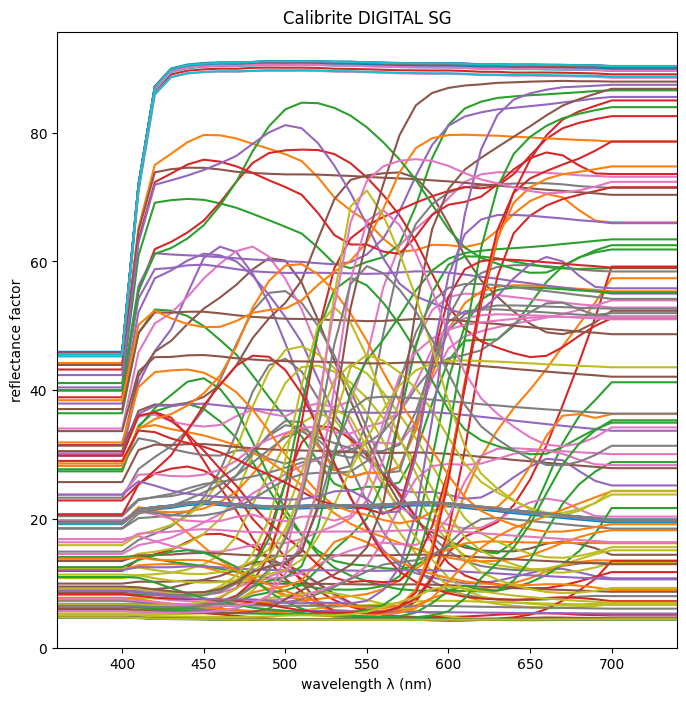

In [6]:
CCDSG = ColourCheckerSpectral("CCDSG")
CCDSG.plot_colourchecker()

### CCC

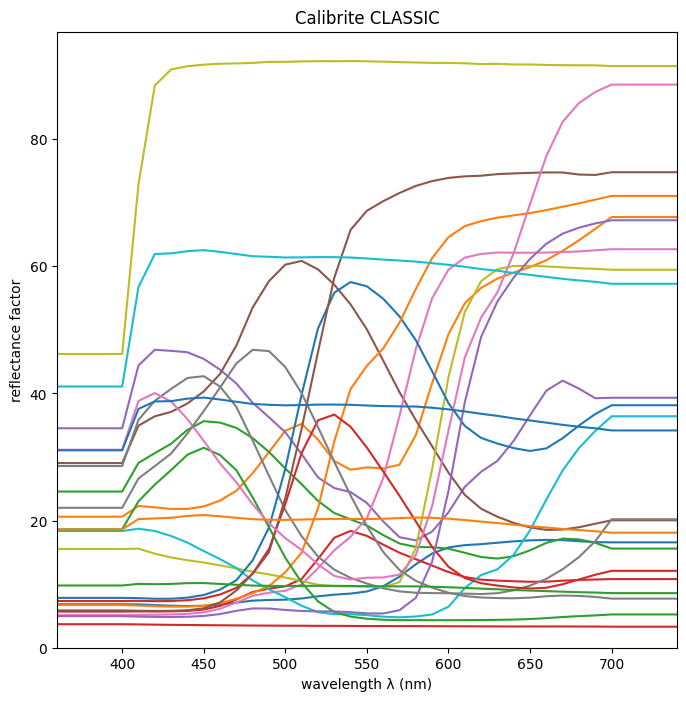

In [7]:
CCC = ColourCheckerSpectral("CCC")
CCC.plot_colourchecker()

### CCPPV

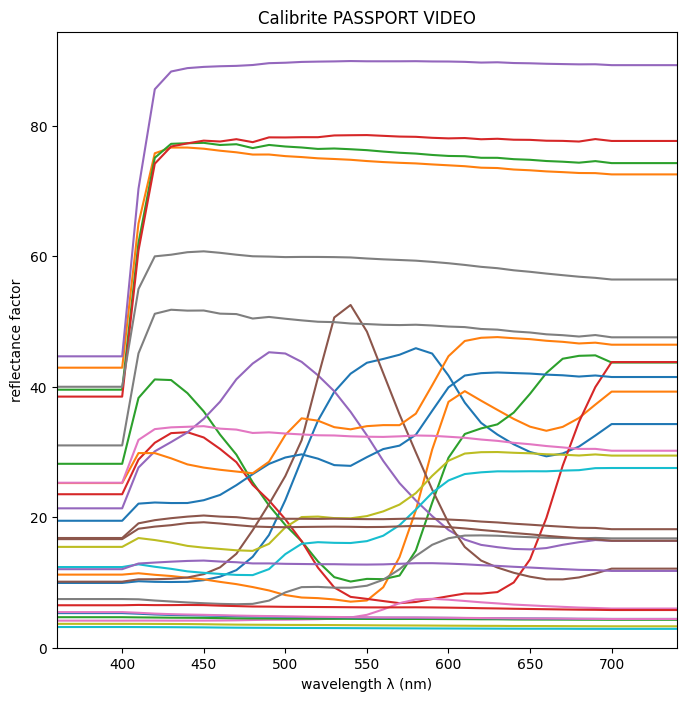

In [8]:
CCPPV = ColourCheckerSpectral("CCPPV")
CCPPV.plot_colourchecker()

### XRCCPP

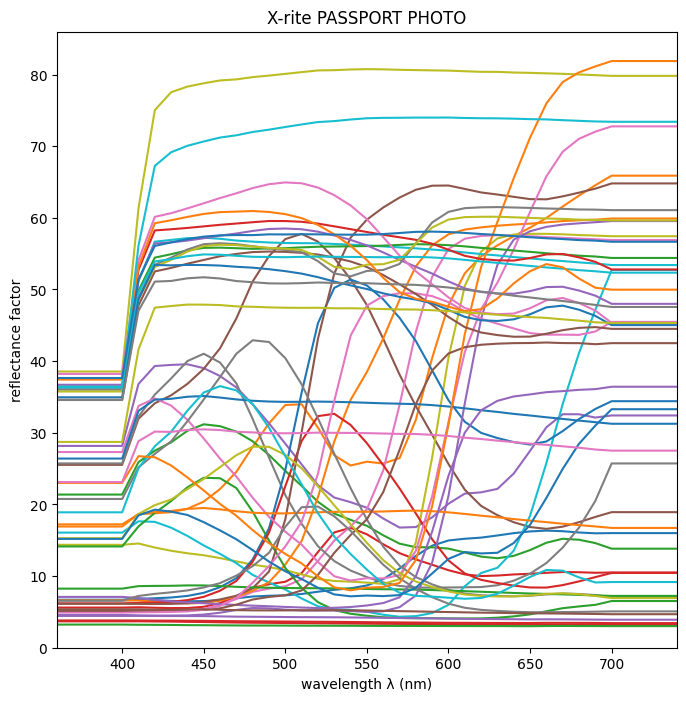

In [9]:
XRCCPP = ColourCheckerSpectral("XRCCPP")
XRCCPP.plot_colourchecker()

### SCK100

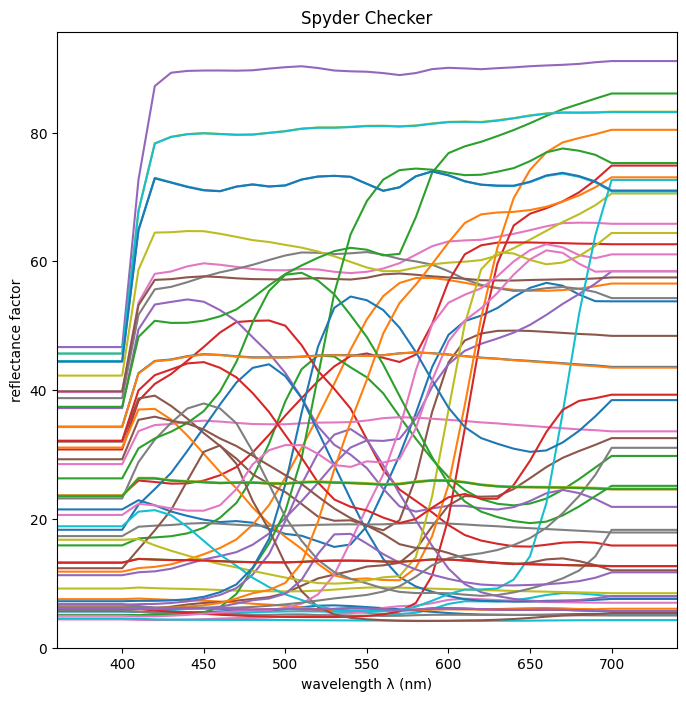

In [10]:
SCK100 = ColourCheckerSpectral("SCK100")
SCK100.plot_colourchecker()

## Indoor

## SPD32

In [11]:
data_spd32 = []
data_wpp_spd32 = []

| Image                             |  Illuminant  | ColourChecker                        | Patches |
|-----------------------------------|--------------|--------------------------------------|---------|
| INDIGO_2022-05-25_Z7ii-A_0002.NEF | SPD32-5011ºK | CCDSG  - Calibrite DIGITAL SG        | 140     |
| INDIGO_2022-05-25_Z7ii-A_0001.NEF | SPD32-5011ºK | CCC - Calibrite Classic              | 24      |
| INDIGO_2022-05-25_Z7ii-A_0004.NEF | SPD32-5011ºK | CCPPV - Calibrite PASSPORT VIDEO     | 24      |
| INDIGO_2022-05-25_Z7ii-A_0005.NEF | SPD32-5011ºK | XRCCPP - X-rite PASSPORT PHOTO       | 24      |
| INDIGO_2022-05-25_Z7ii-A_0003.NEF | SPD32-5011ºK | SCK100 - SpyderCHECKR                | 48      |

<img src="res/screenshot/NikonZ7ii/SPD32/INDIGO_2022-05-25_Z7ii-A_0002.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD32/INDIGO_2022-05-25_Z7ii-A_0001.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD32/INDIGO_2022-05-25_Z7ii-A_0004.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD32/INDIGO_2022-05-25_Z7ii-A_0005.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD32/INDIGO_2022-05-25_Z7ii-A_0003.jpg" width="400">

## SPD Illuminant

In [13]:
from coolpi.colour.cie_colour_spectral import MeasuredIlluminant

SPD32

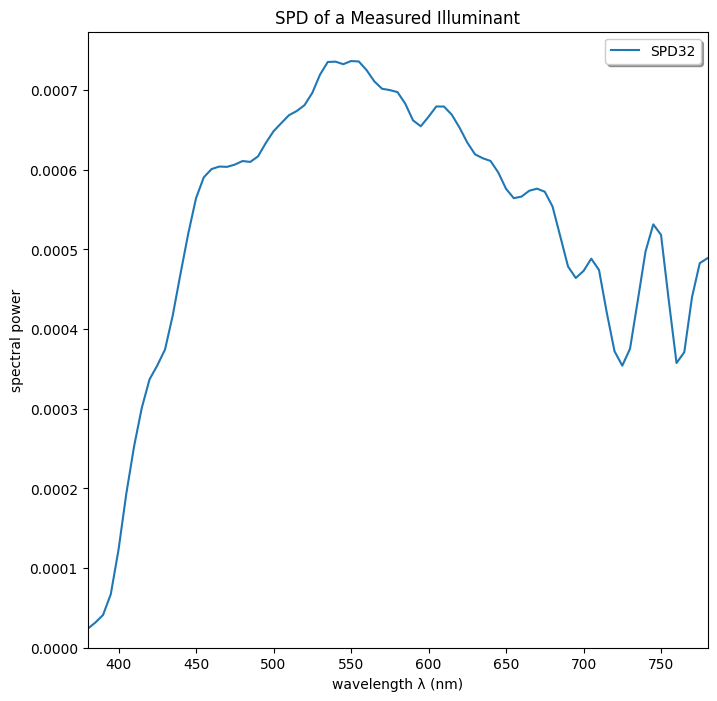

In [14]:
file_spd = ["res", "spd", "INDIGO-C7000-A_032_02°_5011K.csv"]
path_spd = os.path.join(*file_spd)

SPD32 = MeasuredIlluminant(illuminant_name="SPD32", path_file=path_spd)

SPD32.plot()

XYZ data (under SPD32)

In [15]:
CCDSG_XYZ_SPD32 = CCDSG.to_ColourCheckerXYZ(illuminant=SPD32, observer=2).as_pandas_dataframe()

In [16]:
CCC_XYZ_SPD32 = CCC.to_ColourCheckerXYZ(illuminant=SPD32, observer=2).as_pandas_dataframe()

In [17]:
CCPPV_XYZ_SPD32 = CCPPV.to_ColourCheckerXYZ(illuminant=SPD32, observer=2).as_pandas_dataframe()

In [18]:
XRCCPP_XYZ_SPD32 = XRCCPP.to_ColourCheckerXYZ(illuminant=SPD32, observer=2).as_pandas_dataframe()

In [19]:
SCK100_XYZ_SPD32 = SCK100.to_ColourCheckerXYZ(illuminant=SPD32, observer=2).as_pandas_dataframe()

## RawImage

In [20]:
from coolpi.image.image_objects import RawImage

### CCDSG

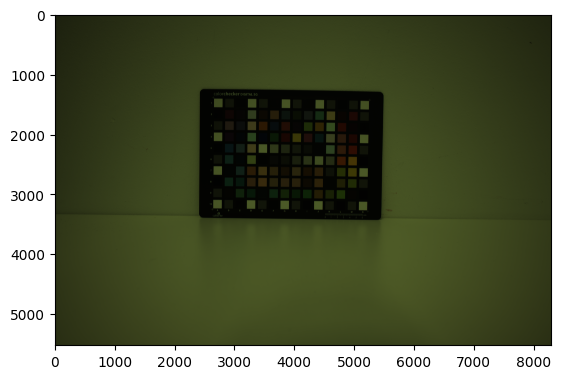

In [23]:
file_raw_0002i = ["data", "NikonZ7ii", "Indoor", "SPD32", "INDIGO_2022-05-25_Z7ii-A_0002.NEF"]
path_raw_0002i= os.path.join(*file_raw_0002i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [15, 45, 00]], "ColourChecker": "CCDSG", "Illuminant": SPD32, "Observer":2}
image_0002i = RawImage(path_raw_0002i, metadata, method="postprocess")

image_0002i.show(method="matplotlib")

RAW RGB data extraction

In [24]:
has_colourchecker, corners, size_rect = image_0002i.automatic_colourchecker_extraction(checker_name="CCDSG", opencv_descriptor="SIFT")

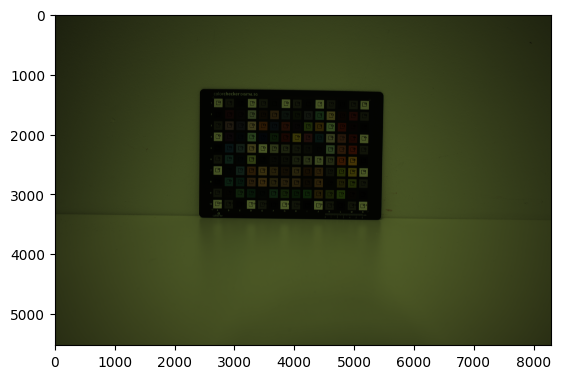

In [25]:
image_0002i.show_colourchecker(checker_name="CCDSG", show_image=True, method="matplotlib")

In [26]:
CCDSG_RGB_SPD32 = image_0002i.get_ColourCheckerRGB("CCDSG").as_pandas_dataframe()

In [27]:
data_ccdsg_spd32 = pd.merge(CCDSG_XYZ_SPD32, CCDSG_RGB_SPD32, on="patch_id")
data_ccdsg_spd32.insert(0, "ColourChecker", "CCDSG")
data_ccdsg_spd32

ColourChecker patch_id                                  illuminant_x  \
0           CCDSG       A1  MeasuredIlluminant object: Illuminant SPD32.   
1           CCDSG       A2  MeasuredIlluminant object: Illuminant SPD32.   
2           CCDSG       A3  MeasuredIlluminant object: Illuminant SPD32.   
3           CCDSG       A4  MeasuredIlluminant object: Illuminant SPD32.   
4           CCDSG       A5  MeasuredIlluminant object: Illuminant SPD32.   
..            ...      ...                                           ...   
135         CCDSG       N6  MeasuredIlluminant object: Illuminant SPD32.   
136         CCDSG       N7  MeasuredIlluminant object: Illuminant SPD32.   
137         CCDSG       N8  MeasuredIlluminant object: Illuminant SPD32.   
138         CCDSG       N9  MeasuredIlluminant object: Illuminant SPD32.   
139         CCDSG      N10  MeasuredIlluminant object: Illuminant SPD32.   

             X          Y          Z  \
0    84.646170  90.861159  68.727225   
1     4.116763   4.392978   3.398870   
2    20.605989  22.095501  16.945781   
3    83.657895  89.800813  68.052758   
4     4.101689   4.378171   3.390265   
..         ...        ...        ...   
135   4.098190   4.375063   3.387885   
136  84.110601  90.285299  68.388790   
137  20.663591  22.154798  16.967227   
138   4.073614   4.347599   3.358430   
139  84.655085  90.866088  68.723820   

                                     illuminant_y            R            G  \
0    MeasuredIlluminant object: Illuminant SPD32.  4030.961914  4761.754639   
1    MeasuredIlluminant object: Illuminant SPD32.   129.402344   152.229980   
2    MeasuredIlluminant object: Illuminant SPD32.   973.266846  1154.932373   
3    MeasuredIlluminant object: Illuminant SPD32.  4311.121582  5099.252930   
4    MeasuredIlluminant object: Illuminant SPD32.   121.038086   140.398438   
..                                            ...          ...          ...   
135  MeasuredIlluminant object: Illuminant SPD32.   154.139160   167.774902   
136  MeasuredIlluminant object: Illuminant SPD32.  4778.034668  5637.174805   
137  MeasuredIlluminant object: Illuminant SPD32.  1105.197510  1300.128906   
138  MeasuredIlluminant object: Illuminant SPD32.   151.546875   164.936035   
139  MeasuredIlluminant object: Illuminant SPD32.  4757.801270  5624.410645   

               B  
0    2106.964111  
1      70.392578  
2     513.351562  
3    2254.115234  
4      64.810059  
..           ...  
135    74.569824  
136  2469.194824  
137   572.479980  
138    73.155762  
139  2463.309326  

[140 rows x 10 columns]

In [28]:
data_ccdsg_spd32 = data_ccdsg_spd32[(data_ccdsg_spd32["patch_id"].str.contains("1")==False) & (data_ccdsg_spd32["patch_id"].str.contains("0")==False) & (data_ccdsg_spd32["patch_id"].str.contains("0")==False) & (data_ccdsg_spd32["patch_id"].str.contains("A")==False) & (data_ccdsg_spd32["patch_id"].str.contains("N")==False)]
data_ccdsg_spd32

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD32.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD32.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD32.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD32.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD32.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD32.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD32.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD32.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD32.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD32.   

             X          Y          Z  \
11   16.268791  10.740402  10.965548   
12   37.385538  32.525748  35.753355   
13   14.164829   9.560519  19.380163   
14   17.235838  21.006411  42.872054   
15   22.901358  31.595065  40.623825   
..         ...        ...        ...   
124  37.175450  22.873005   5.783552   
125  66.957214  61.524962   7.810749   
126  60.119088  62.200511   6.218970   
127  37.051981  44.979270   6.572756   
128   7.083309   6.666748   3.676069   

                                     illuminant_y            R            G  \
11   MeasuredIlluminant object: Illuminant SPD32.   949.927734   387.938477   
12   MeasuredIlluminant object: Illuminant SPD32.  2042.370605  1675.081055   
13   MeasuredIlluminant object: Illuminant SPD32.   686.565430   394.347168   
14   MeasuredIlluminant object: Illuminant SPD32.   516.881348  1322.264160   
15   MeasuredIlluminant object: Illuminant SPD32.   844.342773  2028.788574   
..                                            ...          ...          ...   
124  MeasuredIlluminant object: Illuminant SPD32.  2954.285156   879.955566   
125  MeasuredIlluminant object: Illuminant SPD32.  4450.046387  3427.479004   
126  MeasuredIlluminant object: Illuminant SPD32.  3881.894043  3678.513428   
127  MeasuredIlluminant object: Illuminant SPD32.  2100.892578  2800.310547   
128  MeasuredIlluminant object: Illuminant SPD32.   378.783203   278.063477   

               B  
11    270.404297  
12   1041.405762  
13    468.224121  
14   1294.863770  
15   1357.920410  
..           ...  
124   211.485840  
125   429.550781  
126   423.710205  
127   385.422363  
128    86.335938  

[96 rows x 10 columns]

In [29]:
data_spd32.append(data_ccdsg_spd32)

### WPP

White - E5

In [30]:
patch_max = find_patch_max_value(data_ccdsg_spd32)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E5', 'E5', 'E5']
['E5', 'E5', 'E5']


In [31]:
data_ccdsg_spd32 = apply_wpp(data_ccdsg_spd32, "E5")
data_ccdsg_spd32

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD32.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD32.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD32.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD32.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD32.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD32.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD32.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD32.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD32.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD32.   

            X         Y         Z  \
11   0.192085  0.118150  0.159627   
12   0.441410  0.357800  0.520467   
13   0.167244  0.105171  0.282120   
14   0.203503  0.231081  0.624095   
15   0.270396  0.347562  0.591367   
..        ...       ...       ...   
124  0.438930  0.251615  0.084192   
125  0.790563  0.676806  0.113702   
126  0.709825  0.684238  0.090530   
127  0.437472  0.494795  0.095681   
128  0.083632  0.073338  0.053513   

                                     illuminant_y         R         G  \
11   MeasuredIlluminant object: Illuminant SPD32.  0.201206  0.069046   
12   MeasuredIlluminant object: Illuminant SPD32.  0.432597  0.298136   
13   MeasuredIlluminant object: Illuminant SPD32.  0.145422  0.070187   
14   MeasuredIlluminant object: Illuminant SPD32.  0.109481  0.235341   
15   MeasuredIlluminant object: Illuminant SPD32.  0.178841  0.361090   
..                                            ...       ...       ...   
124  MeasuredIlluminant object: Illuminant SPD32.  0.625751  0.156617   
125  MeasuredIlluminant object: Illuminant SPD32.  0.942571  0.610033   
126  MeasuredIlluminant object: Illuminant SPD32.  0.822230  0.654713   
127  MeasuredIlluminant object: Illuminant SPD32.  0.444993  0.498408   
128  MeasuredIlluminant object: Illuminant SPD32.  0.080231  0.049491   

            B  
11   0.109121  
12   0.420256  
13   0.188950  
14   0.522538  
15   0.547985  
..        ...  
124  0.085344  
125  0.173344  
126  0.170987  
127  0.155536  
128  0.034841  

[96 rows x 10 columns]

In [32]:
data_ccdsg_spd32.describe()

X          Y          Z          R          G          B
count  96.000000  96.000000  96.000000  96.000000  96.000000  96.000000
mean    0.359874   0.343982   0.286629   0.376494   0.326219   0.285795
std     0.227683   0.222816   0.235567   0.258665   0.225797   0.225124
min     0.048308   0.048040   0.049208   0.032326   0.036851   0.034841
25%     0.160375   0.159195   0.099141   0.147904   0.138125   0.111346
50%     0.333561   0.347138   0.211406   0.356183   0.305382   0.212725
75%     0.475854   0.465611   0.410691   0.566089   0.434240   0.389418
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [33]:
data_wpp_spd32.append(data_ccdsg_spd32)

### CCC

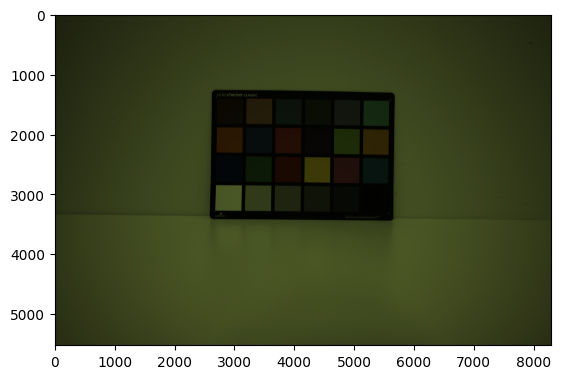

In [34]:
file_raw_0001i = ["data", "NikonZ7ii", "Indoor", "SPD32", "INDIGO_2022-05-25_Z7ii-A_0001.NEF"]
path_raw_0001i = os.path.join(*file_raw_0001i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [15, 45, 00]], "ColourChecker": "CCC", "Illuminant": SPD32, "Observer":2}
image_0001i = RawImage(path_raw_0001i, metadata, method="postprocess")

image_0001i.show(method="matplotlib")

RAW RGB data extraction

In [35]:
has_colourchecker, corners, size_rect = image_0001i.automatic_colourchecker_extraction(checker_name="CCC", opencv_descriptor="SIFT")

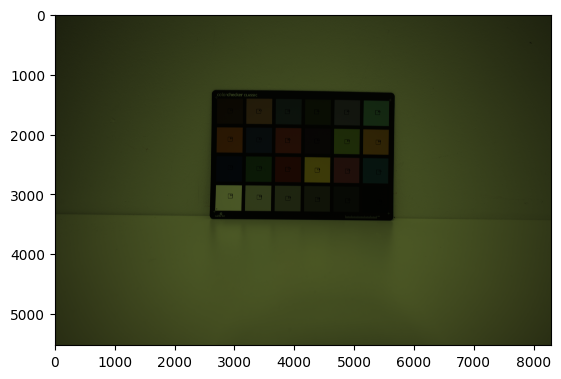

In [36]:
image_0001i.show_colourchecker(checker_name="CCC", show_image=True, method="matplotlib")

In [37]:
CCC_RGB_SPD32 = image_0001i.get_ColourCheckerRGB("CCC").as_pandas_dataframe()

In [38]:
data_ccc_spd32 = pd.merge(CCC_XYZ_SPD32, CCC_RGB_SPD32, on="patch_id")
data_ccc_spd32.insert(0, "ColourChecker", "CCC")
data_ccc_spd32

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD32.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD32.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD32.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD32.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD32.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD32.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD32.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD32.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD32.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD32.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD32.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD32.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD32.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD32.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD32.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD32.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD32.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD32.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD32.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD32.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD32.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD32.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD32.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD32.   

            X          Y          Z  \
0   12.143697  11.038802   5.258558   
1   38.506470  35.551973  18.521229   
2   17.208724  19.193302  25.453253   
3   11.380645  14.183805   5.381845   
4   24.475642  24.064665  32.532676   
5   31.154612  43.579261  33.812267   
6   40.719433  32.266562   5.011403   
7   12.286057  11.749995  28.790822   
8   29.598221  19.960287   9.879678   
9    8.548121   6.663980  10.557428   
10  35.699073  46.314219   8.970218   
11  48.757617  44.881921   6.042869   
12   7.132515   6.201849  20.660629   
13  15.179575  24.276049   7.758575   
14  21.707439  13.356733   4.074536   
15  59.605814  62.673381   7.355245   
16  30.256308  20.487580  22.568438   
17  13.695901  19.818417  29.523170   
18  85.825029  92.138850  69.529958   
19  56.483403  60.887799  47.183965   
20  35.095808  37.871510  29.558901   
21  18.832151  20.229679  15.631717   
22   8.917040   9.622484   7.608479   
23   3.179754   3.411937   2.692669   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD32.   725.986883   574.088349   
1   MeasuredIlluminant object: Illuminant SPD32.  2304.921296  1798.161265   
2   MeasuredIlluminant object: Illuminant SPD32.   769.333719  1164.398920   
3   MeasuredIlluminant object: Illuminant SPD32.   596.445216   854.609568   
4   MeasuredIlluminant object: Illuminant SPD32.  1205.637539  1391.601466   
5   MeasuredIlluminant object: Illuminant SPD32.  1292.906829  2556.241512   
6   MeasuredIlluminant object: Illuminant SPD32.  2714.249228  1527.113426   
7   MeasuredIlluminant object: Illuminant SPD32.   482.465278   785.993056   
8   MeasuredIlluminant object: Illuminant SPD32.  2170.368827   902.522762   
9   MeasuredIlluminant object: Illuminant SPD32.   479.903549   387.715278   
10  MeasuredIlluminant object: Illuminant SPD32.  1901.214892  2777.798611   
11  MeasuredIlluminant object: Illuminant SPD32.  3016.212963  2272.160494   
12  MeasuredIlluminant object: Illuminant SPD32.   241.212963   417.441744   
13  MeasuredIlluminant object: Illuminant SPD32.   716.3904

In [39]:
data_spd32.append(data_ccc_spd32)

### WPP

White - D1

In [40]:
patch_max = find_patch_max_value(data_ccc_spd32)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [41]:
data_ccc_spd32 = apply_wpp(data_ccc_spd32, "D1")
data_ccc_spd32

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD32.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD32.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD32.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD32.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD32.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD32.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD32.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD32.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD32.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD32.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD32.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD32.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD32.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD32.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD32.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD32.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD32.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD32.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD32.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD32.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD32.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD32.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD32.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD32.   

           X         Y         Z  \
0   0.141494  0.119806  0.075630   
1   0.448662  0.385852  0.266378   
2   0.200509  0.208308  0.366076   
3   0.132603  0.153939  0.077403   
4   0.285181  0.261178  0.467894   
5   0.363001  0.472974  0.486298   
6   0.474447  0.350195  0.072075   
7   0.143152  0.127525  0.414078   
8   0.344867  0.216633  0.142092   
9   0.099599  0.072325  0.151840   
10  0.415952  0.502657  0.129012   
11  0.568105  0.487112  0.086910   
12  0.083105  0.067310  0.297147   
13  0.176867  0.263472  0.111586   
14  0.252927  0.144963  0.058601   
15  0.694504  0.680206  0.105785   
16  0.352535  0.222355  0.324586   
17  0.159579  0.215093  0.424611   
18  1.000000  1.000000  1.000000   
19  0.658123  0.660827  0.678613   
20  0.408923  0.411027  0.425125   
21  0.219425  0.219556  0.224820   
22  0.103898  0.104435  0.109427   
23  0.037049  0.037030  0.038727   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD32.  0.154852  0.103920  0.078835  
1   MeasuredIlluminant object: Illuminant SPD32.  0.491638  0.325500  0.273960  
2   MeasuredIlluminant object: Illuminant SPD32.  0.164098  0.210777  0.319218  
3   MeasuredIlluminant object: Illuminant SPD32.  0.127221  0.154700  0.096773  
4   MeasuredIlluminant object: Illuminant SPD32.  0.257161  0.251905  0.394091  
5   MeasuredIlluminant object: Illuminant SPD32.  0.275776  0.462726  0.468057  
6   MeasuredIlluminant object: Illuminant SPD32.  0.578947  0.276435  0.102352  
7   MeasuredIlluminant object: Illuminant SPD32.  0.102909  0.142279  0.342504  
8   MeasuredIlluminant object: Illuminant SPD32.  0.462938  0.163373  0.143778  
9   MeasuredIlluminant object: Illuminant SPD32.  0.102363  0.070183  0.126381  
10  MeasuredIlluminant object: Illuminant SPD32.  0.405527  0.502832  0.215754  
11  MeasuredIlluminant object: Illuminant SPD32.  0.643356  0.411302  0.134604  
12  MeasuredIlluminant object: Illuminant SPD32.  0.051451  0.075565  0.236552  
13  MeasuredIlluminant object: Illuminant SPD32.  0.152805  0.292352  0.170377  
14  Measure

In [42]:
data_ccc_spd32.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.323521   0.307699   0.272280   0.339774   0.296876   0.274780
std     0.232690   0.233166   0.232492   0.259231   0.233263   0.218701
min     0.037049   0.037030   0.038727   0.040821   0.041578   0.043100
25%     0.142738   0.140604   0.101067   0.121732   0.133786   0.122565
50%     0.269054   0.220956   0.188330   0.266469   0.234215   0.226093
75%     0.424129   0.426513   0.416711   0.470113   0.415819   0.355401
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [43]:
data_wpp_spd32.append(data_ccc_spd32)

### CCPPV

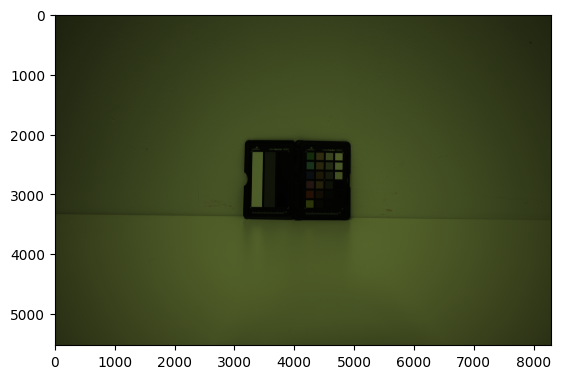

In [44]:
file_raw_0004i = ["data", "NikonZ7ii", "Indoor", "SPD32", "INDIGO_2022-05-25_Z7ii-A_0004.NEF"]
path_raw_0004i = os.path.join(*file_raw_0004i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [15, 45, 00]], "ColourChecker": "CCPPV", "Illuminant": SPD32, "Observer":2}
image_0004i = RawImage(path_raw_0004i, metadata, method="postprocess")

image_0004i.show(method="matplotlib")

RAW RGB data extraction

In [46]:
has_colourchecker, corners, size_rect = image_0004i.automatic_colourchecker_extraction(checker_name="CCPPV_24", opencv_descriptor="SIFT") # Fails

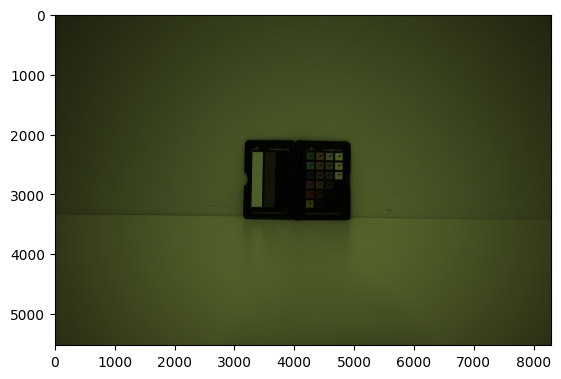

In [47]:
image_0004i.show_colourchecker(checker_name="CCPPV", show_image=True, method="matplotlib")

In [48]:
CCPPV_RGB_SPD32 = image_0004i.get_ColourCheckerRGB("CCPPV").as_pandas_dataframe()

In [49]:
data_ccppv_spd32 = pd.merge(CCPPV_XYZ_SPD32, CCPPV_RGB_SPD32, on="patch_id")
data_ccppv_spd32.insert(0, "ColourChecker", "CCPPV")
data_ccppv_spd32

ColourChecker patch_id                                  illuminant_x  \
0          CCPPV       A1  MeasuredIlluminant object: Illuminant SPD32.   
1          CCPPV       A2  MeasuredIlluminant object: Illuminant SPD32.   
2          CCPPV       A3  MeasuredIlluminant object: Illuminant SPD32.   
3          CCPPV       A4  MeasuredIlluminant object: Illuminant SPD32.   
4          CCPPV       A5  MeasuredIlluminant object: Illuminant SPD32.   
5          CCPPV       A6  MeasuredIlluminant object: Illuminant SPD32.   
6          CCPPV       B1  MeasuredIlluminant object: Illuminant SPD32.   
7          CCPPV       B2  MeasuredIlluminant object: Illuminant SPD32.   
8          CCPPV       B3  MeasuredIlluminant object: Illuminant SPD32.   
9          CCPPV       B4  MeasuredIlluminant object: Illuminant SPD32.   
10         CCPPV       B5  MeasuredIlluminant object: Illuminant SPD32.   
11         CCPPV       B6  MeasuredIlluminant object: Illuminant SPD32.   
12         CCPPV       C1  MeasuredIlluminant object: Illuminant SPD32.   
13         CCPPV       C2  MeasuredIlluminant object: Illuminant SPD32.   
14         CCPPV       C3  MeasuredIlluminant object: Illuminant SPD32.   
15         CCPPV       C4  MeasuredIlluminant object: Illuminant SPD32.   
16         CCPPV       C5  MeasuredIlluminant object: Illuminant SPD32.   
17         CCPPV       C6  MeasuredIlluminant object: Illuminant SPD32.   
18         CCPPV       D1  MeasuredIlluminant object: Illuminant SPD32.   
19         CCPPV       D2  MeasuredIlluminant object: Illuminant SPD32.   
20         CCPPV       D3  MeasuredIlluminant object: Illuminant SPD32.   
21         CCPPV       D4  MeasuredIlluminant object: Illuminant SPD32.   
22         CCPPV       D5  MeasuredIlluminant object: Illuminant SPD32.   
23         CCPPV       D6  MeasuredIlluminant object: Illuminant SPD32.   

            X          Y          Z  \
0   33.889870  38.958863   9.555968   
1   23.249314  16.751567   7.653139   
2   23.645721  17.501367  24.793240   
3   10.737700   9.843445  22.214469   
4   21.750074  29.579067  28.386012   
5   22.077289  34.325878  10.967807   
6    5.971769   5.806012   3.191999   
7   12.809427  11.851741   5.334368   
8   23.104013  22.569153  11.936800   
9   20.149156  19.144072   8.991313   
10  32.625349  32.223624  18.300903   
11  36.874583  36.707535  21.439668   
12   4.116589   4.413525   3.458589   
13   5.760566   6.184376   4.905213   
14  11.965294  12.806231  10.008438   
15  18.304188  19.680954  15.205546   
16  30.205120  32.396992  25.488361   
17  46.185183  49.586655  38.911485   
18   3.186970   3.429236   2.721690   
19   2.776552   2.982893   2.356767   
20   4.309833   4.621937   3.728439   
21  69.336818  74.478971  57.804470   
22  70.673019  76.008924  58.452769   
23  72.855259  78.283978  58.779296   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD32.  2879.018595  3448.053719   
1   MeasuredIlluminant object: Illuminant SPD32.  2332.454545  1080.818182   
2   MeasuredIlluminant object: Illuminant SPD32.  2293.413223  1426.995868   
3   MeasuredIlluminant object: Illuminant SPD32.   677.095041   933.057851   
4   MeasuredIlluminant object: Illuminant SPD32.  1537.601240  3203.847107   
5   MeasuredIlluminant object: Illuminant SPD32.  1226.958678  2790.438017   
6   MeasuredIlluminant object: Illuminant SPD32.   436.818182   414.652893   
7   MeasuredIlluminant object: Illuminant SPD32.  1122.859504   882.582645   
8   MeasuredIlluminant object: Illuminant SPD32.  2230.704545  2012.528926   
9   MeasuredIlluminant object: Illuminant SPD32.  1856.785124  1554.359504   
10  MeasuredIlluminant object: Illuminant SPD32.  2663.694215  2500.363636   
11  MeasuredIlluminant object: Illuminant SPD32.  2920.657025  2793.954545   
12  MeasuredIlluminant object: Illuminant SPD32.   267.388430   323.628099   
13  MeasuredIlluminant object: Illuminant SPD32.   369.1900

In [50]:
data_spd32.append(data_ccppv_spd32)

### WPP

White - D6

In [51]:
patch_max = find_patch_max_value(data_ccppv_spd32)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D6', 'D6', 'D6']
['D6', 'D6', 'D6']


In [52]:
data_ccppv_spd32 = apply_wpp(data_ccppv_spd32, "D6")
data_ccppv_spd32

ColourChecker patch_id                                  illuminant_x  \
0          CCPPV       A1  MeasuredIlluminant object: Illuminant SPD32.   
1          CCPPV       A2  MeasuredIlluminant object: Illuminant SPD32.   
2          CCPPV       A3  MeasuredIlluminant object: Illuminant SPD32.   
3          CCPPV       A4  MeasuredIlluminant object: Illuminant SPD32.   
4          CCPPV       A5  MeasuredIlluminant object: Illuminant SPD32.   
5          CCPPV       A6  MeasuredIlluminant object: Illuminant SPD32.   
6          CCPPV       B1  MeasuredIlluminant object: Illuminant SPD32.   
7          CCPPV       B2  MeasuredIlluminant object: Illuminant SPD32.   
8          CCPPV       B3  MeasuredIlluminant object: Illuminant SPD32.   
9          CCPPV       B4  MeasuredIlluminant object: Illuminant SPD32.   
10         CCPPV       B5  MeasuredIlluminant object: Illuminant SPD32.   
11         CCPPV       B6  MeasuredIlluminant object: Illuminant SPD32.   
12         CCPPV       C1  MeasuredIlluminant object: Illuminant SPD32.   
13         CCPPV       C2  MeasuredIlluminant object: Illuminant SPD32.   
14         CCPPV       C3  MeasuredIlluminant object: Illuminant SPD32.   
15         CCPPV       C4  MeasuredIlluminant object: Illuminant SPD32.   
16         CCPPV       C5  MeasuredIlluminant object: Illuminant SPD32.   
17         CCPPV       C6  MeasuredIlluminant object: Illuminant SPD32.   
18         CCPPV       D1  MeasuredIlluminant object: Illuminant SPD32.   
19         CCPPV       D2  MeasuredIlluminant object: Illuminant SPD32.   
20         CCPPV       D3  MeasuredIlluminant object: Illuminant SPD32.   
21         CCPPV       D4  MeasuredIlluminant object: Illuminant SPD32.   
22         CCPPV       D5  MeasuredIlluminant object: Illuminant SPD32.   
23         CCPPV       D6  MeasuredIlluminant object: Illuminant SPD32.   

           X         Y         Z  \
0   0.465167  0.497661  0.162574   
1   0.319116  0.213985  0.130201   
2   0.324558  0.223563  0.421802   
3   0.147384  0.125740  0.377930   
4   0.298538  0.377843  0.482925   
5   0.303029  0.438479  0.186593   
6   0.081968  0.074166  0.054305   
7   0.175820  0.151394  0.090753   
8   0.317122  0.288298  0.203078   
9   0.276564  0.244546  0.152967   
10  0.447810  0.411625  0.311349   
11  0.506135  0.468902  0.364749   
12  0.056504  0.056378  0.058840   
13  0.079069  0.078999  0.083451   
14  0.164234  0.163587  0.170271   
15  0.251240  0.251405  0.258689   
16  0.414591  0.413839  0.433628   
17  0.633931  0.633420  0.661993   
18  0.043744  0.043805  0.046304   
19  0.038111  0.038103  0.040095   
20  0.059156  0.059041  0.063431   
21  0.951706  0.951395  0.983415   
22  0.970047  0.970938  0.994445   
23  1.000000  1.000000  1.000000   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD32.  0.577405  0.578286  0.263794  
1   MeasuredIlluminant object: Illuminant SPD32.  0.467788  0.181268  0.135537  
2   MeasuredIlluminant object: Illuminant SPD32.  0.459958  0.239327  0.438744  
3   MeasuredIlluminant object: Illuminant SPD32.  0.135796  0.156486  0.398497  
4   MeasuredIlluminant object: Illuminant SPD32.  0.308375  0.537329  0.653315  
5   MeasuredIlluminant object: Illuminant SPD32.  0.246074  0.467994  0.262121  
6   MeasuredIlluminant object: Illuminant SPD32.  0.087607  0.069543  0.056196  
7   MeasuredIlluminant object: Illuminant SPD32.  0.225196  0.148021  0.103653  
8   MeasuredIlluminant object: Illuminant SPD32.  0.447381  0.337528  0.265416  
9   MeasuredIlluminant object: Illuminant SPD32.  0.372390  0.260687  0.186142  
10  MeasuredIlluminant object: Illuminant SPD32.  0.534220  0.419345  0.356733  
11  MeasuredIlluminant object: Illuminant SPD32.  0.585756  0.468584  0.401325  
12  MeasuredIlluminant object: Illuminant SPD32.  0.053626  0.054277  0.056700  
13  MeasuredIlluminant object: Illuminant SPD32.  0.074043  0.075376  0.079454  
14  Measure

In [53]:
data_ccppv_spd32.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.346898   0.340713   0.322241   0.379828   0.356968   0.346703
std     0.290158   0.294550   0.305189   0.293313   0.296768   0.302337
min     0.038111   0.038103   0.040095   0.023735   0.023206   0.025217
25%     0.131030   0.114055   0.088927   0.123748   0.129860   0.097603
50%     0.300784   0.247976   0.194836   0.340382   0.269534   0.264605
75%     0.452150   0.446085   0.424759   0.545016   0.485770   0.447820
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [54]:
data_wpp_spd32.append(data_ccppv_spd32)

### XRCCPP

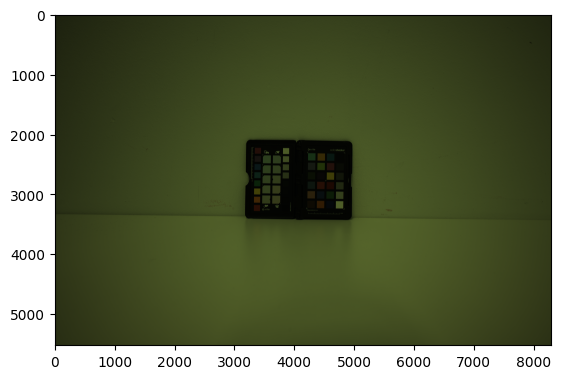

In [55]:
file_raw_0005i = ["data", "NikonZ7ii", "Indoor", "SPD32", "INDIGO_2022-05-25_Z7ii-A_0005.NEF"]
path_raw_0005i = os.path.join(*file_raw_0005i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [15, 45, 00]], "ColourChecker": "XRCCPP", "Illuminant": SPD32, "Observer":2}
image_0005i = RawImage(path_raw_0005i, metadata, method="postprocess")

image_0005i.show(method="matplotlib")

RAW RGB data extraction

In [56]:
has_colourchecker, corners, size_rect = image_0005i.automatic_colourchecker_extraction(checker_name="XRCCPP_24", opencv_descriptor="SIFT")

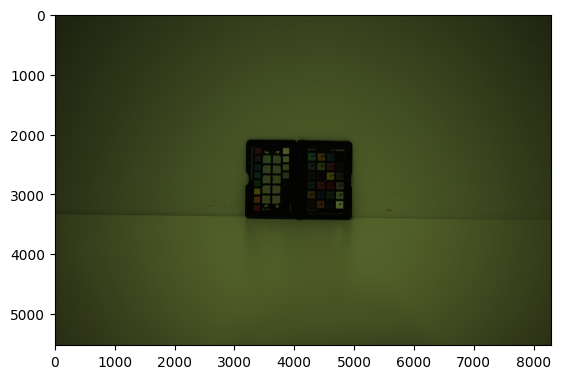

In [57]:
image_0005i.show_colourchecker(checker_name="XRCCPP", show_image=True, method="matplotlib")

In [58]:
XRCCPP_RGB_SPD32 = image_0005i.get_ColourCheckerRGB("XRCCPP").as_pandas_dataframe()

In [59]:
data_xrccpp_spd32 = pd.merge(XRCCPP_XYZ_SPD32, XRCCPP_RGB_SPD32, on="patch_id")
data_xrccpp_spd32.insert(0, "ColourChecker", "XRCCPP")
data_xrccpp_spd32

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD32.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD32.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD32.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD32.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD32.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD32.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD32.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD32.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD32.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD32.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD32.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD32.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD32.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD32.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD32.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD32.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD32.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD32.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD32.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD32.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD32.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD32.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD32.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD32.   

            X          Y          Z  \
0   11.670449  10.680254   5.148434   
1   36.810833  33.641045  17.511374   
2   15.232674  16.960271  22.349400   
3   10.421726  12.956693   5.130053   
4   21.129125  20.959260  27.965735   
5   29.266611  41.264224  32.423859   
6   38.000643  30.288569   4.851200   
7   12.023218  11.550233  27.566625   
8   28.233161  19.016565   9.509564   
9    8.164980   6.448828  10.015679   
10  31.974219  41.340661   8.125202   
11  43.715659  40.511519   5.707680   
12   6.150586   5.575456  15.838053   
13  14.095700  22.345867   7.363324   
14  20.071283  12.274559   3.731015   
15  51.758212  54.735121   6.529799   
16  27.272911  18.525082  20.293982   
17  12.743275  18.368081  27.335092   
18  74.925991  80.531116  59.805453   
19  51.927597  55.917956  43.256931   
20  31.522279  33.999837  26.452513   
21  17.555366  18.894300  14.584535   
22   7.522822   8.139877   6.524551   
23   3.106872   3.344923   2.706822   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD32.   854.512397   697.066116   
1   MeasuredIlluminant object: Illuminant SPD32.  2754.845041  2116.202479   
2   MeasuredIlluminant object: Illuminant SPD32.   893.169421  1373.090909   
3   MeasuredIlluminant object: Illuminant SPD32.   681.665289   985.028926   
4   MeasuredIlluminant object: Illuminant SPD32.  1368.533058  1645.710744   
5   MeasuredIlluminant object: Illuminant SPD32.  1493.818182  3082.347107   
6   MeasuredIlluminant object: Illuminant SPD32.  3092.239669  1774.942149   
7   MeasuredIlluminant object: Illuminant SPD32.   565.223140   924.909091   
8   MeasuredIlluminant object: Illuminant SPD32.  2415.657025  1002.066116   
9   MeasuredIlluminant object: Illuminant SPD32.   545.580579   455.969008   
10  MeasuredIlluminant object: Illuminant SPD32.  2199.665289  3228.301653   
11  MeasuredIlluminant object: Illuminant SPD32.  3438.630165  2695.107438   
12  MeasuredIlluminant object: Illuminant SPD32.   290.045455   516.326446   
13  MeasuredIlluminant object: Illuminant SPD32.   788.5123

In [60]:
data_spd32.append(data_xrccpp_spd32)

### WPP

White - D1

In [61]:
patch_max = find_patch_max_value(data_xrccpp_spd32)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [62]:
data_xrccpp_spd32 = apply_wpp(data_xrccpp_spd32, "D1")
data_xrccpp_spd32

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD32.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD32.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD32.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD32.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD32.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD32.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD32.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD32.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD32.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD32.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD32.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD32.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD32.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD32.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD32.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD32.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD32.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD32.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD32.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD32.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD32.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD32.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD32.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD32.   

           X         Y         Z  \
0   0.155760  0.132623  0.086086   
1   0.491296  0.417740  0.292806   
2   0.203303  0.210605  0.373702   
3   0.139094  0.160891  0.085779   
4   0.282000  0.260263  0.467612   
5   0.390607  0.512401  0.542156   
6   0.507176  0.376110  0.081116   
7   0.160468  0.143426  0.460938   
8   0.376814  0.236139  0.159008   
9   0.108974  0.080079  0.167471   
10  0.426744  0.513350  0.135861   
11  0.583451  0.503054  0.095437   
12  0.082089  0.069234  0.264826   
13  0.188128  0.277481  0.123121   
14  0.267881  0.152420  0.062386   
15  0.690791  0.679677  0.109184   
16  0.363998  0.230036  0.339333   
17  0.170078  0.228087  0.457067   
18  1.000000  1.000000  1.000000   
19  0.693052  0.694365  0.723294   
20  0.420712  0.422195  0.442309   
21  0.234303  0.234621  0.243866   
22  0.100403  0.101077  0.109096   
23  0.041466  0.041536  0.045260   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD32.  0.169722  0.115700  0.090792  
1   MeasuredIlluminant object: Illuminant SPD32.  0.547162  0.351251  0.305661  
2   MeasuredIlluminant object: Illuminant SPD32.  0.177400  0.227908  0.347723  
3   MeasuredIlluminant object: Illuminant SPD32.  0.135391  0.163497  0.105440  
4   MeasuredIlluminant object: Illuminant SPD32.  0.271815  0.273158  0.431391  
5   MeasuredIlluminant object: Illuminant SPD32.  0.296699  0.511613  0.530931  
6   MeasuredIlluminant object: Illuminant SPD32.  0.614175  0.294608  0.113181  
7   MeasuredIlluminant object: Illuminant SPD32.  0.112264  0.153518  0.370011  
8   MeasuredIlluminant object: Illuminant SPD32.  0.479793  0.166325  0.152247  
9   MeasuredIlluminant object: Illuminant SPD32.  0.108362  0.075682  0.137476  
10  MeasuredIlluminant object: Illuminant SPD32.  0.436893  0.535839  0.237015  
11  MeasuredIlluminant object: Illuminant SPD32.  0.682974  0.447338  0.156562  
12  MeasuredIlluminant object: Illuminant SPD32.  0.057608  0.085701  0.268258  
13  MeasuredIlluminant object: Illuminant SPD32.  0.156613  0.291623  0.177993  
14  Measure

In [63]:
data_xrccpp_spd32.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.336608   0.319892   0.286155   0.351144   0.307192   0.289832
std     0.235444   0.235610   0.238185   0.260744   0.233561   0.220415
min     0.041466   0.041536   0.045260   0.045301   0.046523   0.049436
25%     0.159291   0.150171   0.105682   0.129955   0.144063   0.132181
50%     0.274941   0.235380   0.205669   0.284257   0.239890   0.234251
75%     0.442882   0.442410   0.445999   0.496635   0.429763   0.383753
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [64]:
data_wpp_spd32.append(data_xrccpp_spd32)

### SCK100

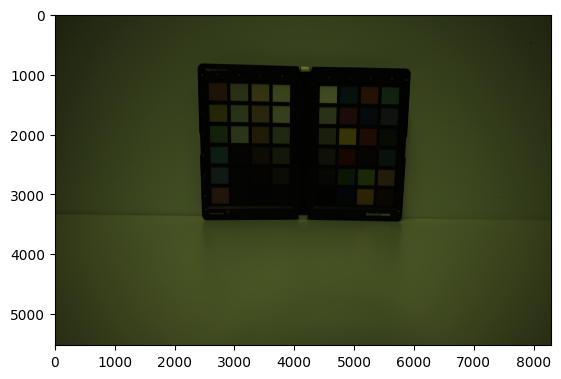

In [65]:
file_raw_0003i = ["data", "NikonZ7ii", "Indoor", "SPD32", "INDIGO_2022-05-25_Z7ii-A_0003.NEF"]
path_raw_0003i = os.path.join(*file_raw_0003i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [15, 45, 00]], "ColourChecker": "SCK100", "Illuminant": SPD32, "Observer":2}
image_0003i = RawImage(path_raw_0003i, metadata, method="postprocess")

image_0003i.show(method="matplotlib")

RAW RGB data extraction

In [66]:
has_colourchecker, corners, size_rect = image_0003i.automatic_colourchecker_extraction(checker_name="SCK100_48", opencv_descriptor="SIFT")

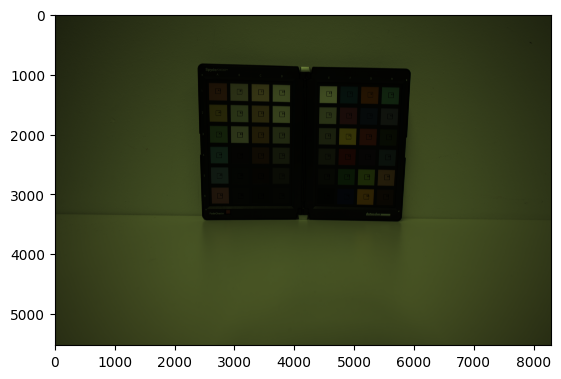

In [67]:
image_0003i.show_colourchecker(checker_name="SCK100", show_image=True, method="matplotlib")

In [68]:
SCK100_RGB_SPD32 = image_0003i.get_ColourCheckerRGB("SCK100").as_pandas_dataframe()

In [69]:
data_sck100_spd32 = pd.merge(SCK100_XYZ_SPD32, SCK100_RGB_SPD32, on="patch_id")
data_sck100_spd32.insert(0, "ColourChecker", "SCK100")
data_sck100_spd32

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD32.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD32.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD32.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD32.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD32.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD32.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD32.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD32.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD32.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD32.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD32.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD32.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD32.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD32.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD32.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD32.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD32.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD32.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD32.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD32.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD32.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD32.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD32.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD32.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD32.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD32.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD32.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD32.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD32.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD32.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD32.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD32.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD32.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD32.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD32.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD32.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD32.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD32.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD32.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD32.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD32.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD32.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD32.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD32.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD32.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD32.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD32.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD32.   

            X          Y          Z  \
0   35.830058  28.995419  15.087237   
1   46.786329  48.482780  12.675378   
2   26.787607  35.988754  16.807137   
3   23.420463  30.541678  35.882907   
4   25.037484  27.744053  38.856936   
5   33.380157  27.219020  24.103977   
6   57.455660  60.097556  44.914615   
7   54.605335  

In [70]:
data_spd32.append(data_sck100_spd32)

### WPP

White - E1

In [71]:
patch_max = find_patch_max_value(data_sck100_spd32)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E1', 'E1', 'E1']
['E1', 'E1', 'E1']


In [72]:
data_sck100_spd32 = apply_wpp(data_sck100_spd32, "E1")
data_sck100_spd32

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD32.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD32.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD32.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD32.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD32.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD32.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD32.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD32.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD32.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD32.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD32.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD32.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD32.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD32.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD32.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD32.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD32.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD32.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD32.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD32.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD32.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD32.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD32.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD32.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD32.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD32.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD32.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD32.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD32.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD32.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD32.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD32.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD32.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD32.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD32.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD32.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD32.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD32.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD32.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD32.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD32.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD32.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD32.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD32.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD32.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD32.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD32.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD32.   

           X         Y         Z  \
0   0.428021  0.323477  0.222018   
1   0.558903  0.540881  0.186526   
2   0.320001  0.401496  0.247328   
3   0.279778  0.340727  0.528039   
4   0.299094  0.309517  0.571804   
5   0.398755  0.303659  0.354705   
6   0.686357  0.670457  0.660947   
7   0.652308  0.669630  0.649580   
8  

In [73]:
data_sck100_spd32.describe()

X          Y          Z          R          G          B
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000
mean    0.353446   0.340781   0.304750   0.379193   0.342560   0.318064
std     0.251149   0.249456   0.249931   0.273020   0.252435   0.245823
min     0.046995   0.047122   0.048523   0.046467   0.047377   0.047825
25%     0.136063   0.136322   0.084449   0.115867   0.132178   0.105359
50%     0.309548   0.294331   0.234673   0.310263   0.273384   0.250096
75%     0.518980   0.494889   0.462455   0.568154   0.503110   0.429990
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [74]:
data_wpp_spd32.append(data_sck100_spd32)

## Merge data

In [75]:
data_pd_spd32 = pd.concat(data_spd32, ignore_index=True)

data_pd_spd32 = data_pd_spd32.drop(columns="illuminant_y")
data_pd_spd32 = data_pd_spd32.rename(columns={"illuminant_x":"illuminant"})
data_pd_spd32["illuminant"] = "SPD32" # as str to avoid error
data_pd_spd32

ColourChecker patch_id illuminant          X          Y          Z  \
0           CCDSG       B2      SPD32  16.268791  10.740402  10.965548   
1           CCDSG       B3      SPD32  37.385538  32.525748  35.753355   
2           CCDSG       B4      SPD32  14.164829   9.560519  19.380163   
3           CCDSG       B5      SPD32  17.235838  21.006411  42.872054   
4           CCDSG       B6      SPD32  22.901358  31.595065  40.623825   
..            ...      ...        ...        ...        ...        ...   
211        SCK100       H2      SPD32  23.700636  23.603217  31.737655   
212        SCK100       H3      SPD32  10.388623  13.174968   5.178507   
213        SCK100       H4      SPD32  16.533287  18.741335  24.614401   
214        SCK100       H5      SPD32  37.535684  34.765251  18.093299   
215        SCK100       H6      SPD32  11.006924   9.908619   4.801334   

               R            G            B  
0     949.927734   387.938477   270.404297  
1    2042.370605  1675.081055  1041.405762  
2     686.565430   394.347168   468.224121  
3     516.881348  1322.264160  1294.863770  
4     844.342773  2028.788574  1357.920410  
..           ...          ...          ...  
211  1028.613379  1244.225340   873.708617  
212   474.880244   717.406746   191.101332  
213   673.772676  1091.466978   719.846088  
214  2235.013322  1786.640590   650.816893  
215   645.613662   496.960743   163.626701  

[216 rows x 9 columns]

In [76]:
data_pd_wpp_spd32 = pd.concat(data_wpp_spd32, ignore_index=True)

data_pd_wpp_spd32 = data_pd_wpp_spd32.drop(columns="illuminant_y")
data_pd_wpp_spd32 = data_pd_wpp_spd32.rename(columns={"illuminant_x":"illuminant"})
data_pd_wpp_spd32["illuminant"] = "SPD32" # as str to avoid error
data_pd_wpp_spd32

ColourChecker patch_id illuminant         X         Y         Z         R  \
0           CCDSG       B2      SPD32  0.192085  0.118150  0.159627  0.201206   
1           CCDSG       B3      SPD32  0.441410  0.357800  0.520467  0.432597   
2           CCDSG       B4      SPD32  0.167244  0.105171  0.282120  0.145422   
3           CCDSG       B5      SPD32  0.203503  0.231081  0.624095  0.109481   
4           CCDSG       B6      SPD32  0.270396  0.347562  0.591367  0.178841   
..            ...      ...        ...       ...       ...       ...       ...   
211        SCK100       H2      SPD32  0.283124  0.263321  0.467039  0.256192   
212        SCK100       H3      SPD32  0.124101  0.146982  0.076205  0.118276   
213        SCK100       H4      SPD32  0.197504  0.209081  0.362216  0.167813   
214        SCK100       H5      SPD32  0.448396  0.387846  0.266254  0.556664   
215        SCK100       H6      SPD32  0.131487  0.110542  0.070655  0.160800   

            G         B  
0    0.069046  0.109121  
1    0.298136  0.420256  
2    0.070187  0.188950  
3    0.235341  0.522538  
4    0.361090  0.547985  
..        ...       ...  
211  0.260115  0.408169  
212  0.149979  0.089277  
213  0.228179  0.336289  
214  0.373511  0.304041  
215  0.103893  0.076441  

[216 rows x 9 columns]

## SPD33

In [77]:
data_spd33 = []
data_wpp_spd33 = []

| Image                             |  Illuminant  | ColourChecker                        | Patches |
|-----------------------------------|--------------|--------------------------------------|---------|
| INDIGO_2022-05-25_Z7ii-A_0014.NEF | SPD33-3064ºK | CCDSG  - Calibrite DIGITAL SG        | 140     |
| INDIGO_2022-05-25_Z7ii-A_0013.NEF | SPD33-3064ºK | CCC - Calibrite Classic              | 24      |
| INDIGO_2022-05-25_Z7ii-A_0016.NEF | SPD33-3064ºK | CCPPV - Calibrite PASSPORT VIDEO     | 24      |
| INDIGO_2022-05-25_Z7ii-A_0017.NEF | SPD33-3064ºK | XRCCPP - X-rite PASSPORT PHOTO       | 24      |
| INDIGO_2022-05-25_Z7ii-A_0015.NEF | SPD33-3064ºK | SCK100 - SpyderCHECKR                | 48      |

<img src="res/screenshot/NikonZ7ii/SPD33/INDIGO_2022-05-25_Z7ii-A_0014.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD33/INDIGO_2022-05-25_Z7ii-A_0013.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD33/INDIGO_2022-05-25_Z7ii-A_0016.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD33/INDIGO_2022-05-25_Z7ii-A_0017.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD33/INDIGO_2022-05-25_Z7ii-A_0015.jpg" width="400">

## SPD Illuminant

SPD33

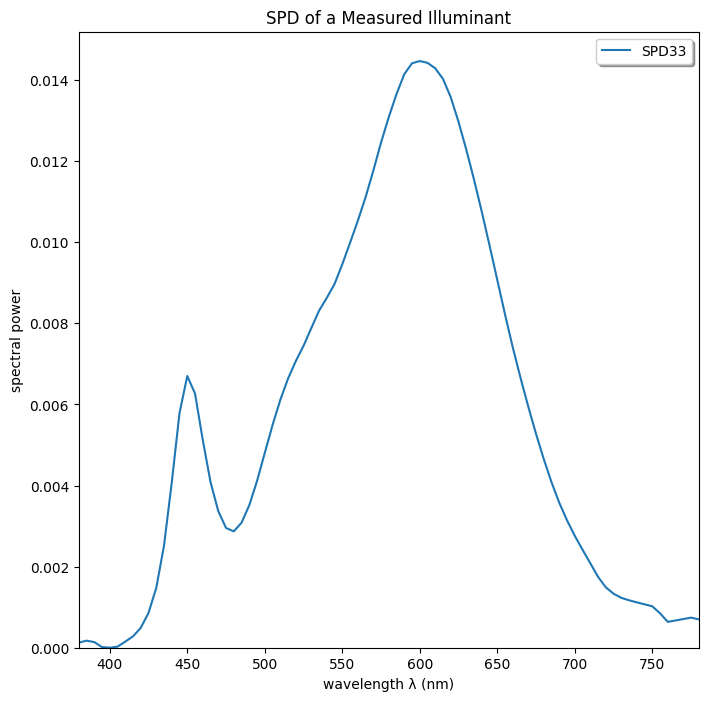

In [78]:
file_spd = ["res", "spd", "INDIGO-C7000-A_033_02°_3064K.csv"]
path_spd = os.path.join(*file_spd)

SPD33 = MeasuredIlluminant(illuminant_name="SPD33", path_file=path_spd)

SPD33.plot()

XYZ data (under SPD33)

In [79]:
CCDSG_XYZ_SPD33 = CCDSG.to_ColourCheckerXYZ(illuminant=SPD33, observer=2).as_pandas_dataframe()

In [80]:
CCC_XYZ_SPD33 = CCC.to_ColourCheckerXYZ(illuminant=SPD33, observer=2).as_pandas_dataframe()

In [81]:
CCPPV_XYZ_SPD33 = CCPPV.to_ColourCheckerXYZ(illuminant=SPD33, observer=2).as_pandas_dataframe()

In [82]:
XRCCPP_XYZ_SPD33 = XRCCPP.to_ColourCheckerXYZ(illuminant=SPD33, observer=2).as_pandas_dataframe()

In [83]:
SCK100_XYZ_SPD33 = SCK100.to_ColourCheckerXYZ(illuminant=SPD33, observer=2).as_pandas_dataframe()

## RawImage

### CCDSG

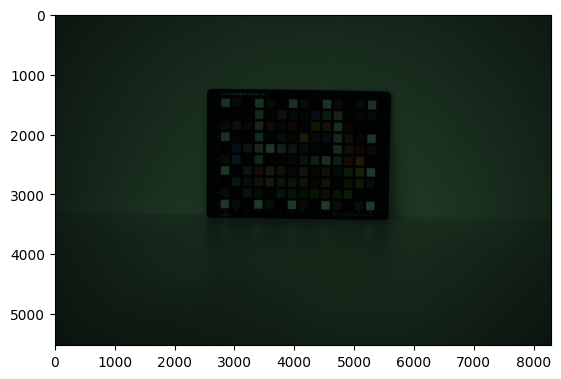

In [85]:
file_raw_0014i = ["data", "NikonZ7ii", "Indoor", "SPD33", "INDIGO_2022-05-25_Z7ii-A_0014.NEF"]
path_raw_0014i= os.path.join(*file_raw_0014i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [17, 30, 00]], "ColourChecker": "CCDSG", "Illuminant": SPD33, "Observer":2}
image_0014i = RawImage(path_raw_0014i, metadata, method="postprocess")

image_0014i.show(method="matplotlib")

RAW RGB data extraction

In [86]:
has_colourchecker, corners, size_rect = image_0014i.automatic_colourchecker_extraction(checker_name="CCDSG", opencv_descriptor="SIFT")

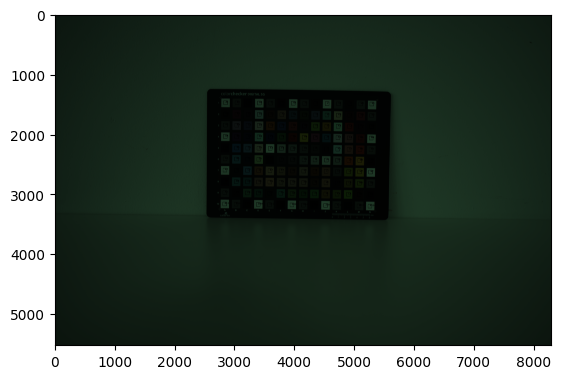

In [87]:
image_0014i.show_colourchecker(checker_name="CCDSG", show_image=True, method="matplotlib")

In [88]:
CCDSG_RGB_SPD33 = image_0014i.get_ColourCheckerRGB("CCDSG").as_pandas_dataframe()

In [89]:
data_ccdsg_spd33 = pd.merge(CCDSG_XYZ_SPD33, CCDSG_RGB_SPD33, on="patch_id")
data_ccdsg_spd33.insert(0, "ColourChecker", "CCDSG")
data_ccdsg_spd33

ColourChecker patch_id                                  illuminant_x  \
0           CCDSG       A1  MeasuredIlluminant object: Illuminant SPD33.   
1           CCDSG       A2  MeasuredIlluminant object: Illuminant SPD33.   
2           CCDSG       A3  MeasuredIlluminant object: Illuminant SPD33.   
3           CCDSG       A4  MeasuredIlluminant object: Illuminant SPD33.   
4           CCDSG       A5  MeasuredIlluminant object: Illuminant SPD33.   
..            ...      ...                                           ...   
135         CCDSG       N6  MeasuredIlluminant object: Illuminant SPD33.   
136         CCDSG       N7  MeasuredIlluminant object: Illuminant SPD33.   
137         CCDSG       N8  MeasuredIlluminant object: Illuminant SPD33.   
138         CCDSG       N9  MeasuredIlluminant object: Illuminant SPD33.   
139         CCDSG      N10  MeasuredIlluminant object: Illuminant SPD33.   

             X          Y          Z  \
0    96.771929  90.822122  35.034660   
1     4.697012   4.393165   1.723795   
2    23.558895  22.125842   8.642089   
3    95.624847  89.752295  34.688599   
4     4.679189   4.377760   1.719666   
..         ...        ...        ...   
135   4.675043   4.374296   1.718205   
136  96.145692  90.237840  34.865102   
137  23.628391  22.187451   8.653108   
138   4.648427   4.347817   1.703217   
139  96.783920  90.827624  35.037149   

                                     illuminant_y            R            G  \
0    MeasuredIlluminant object: Illuminant SPD33.  1663.833008  3047.575195   
1    MeasuredIlluminant object: Illuminant SPD33.    71.826660   134.728027   
2    MeasuredIlluminant object: Illuminant SPD33.   414.846436   765.389893   
3    MeasuredIlluminant object: Illuminant SPD33.  1774.927246  3249.603516   
4    MeasuredIlluminant object: Illuminant SPD33.    63.263428   118.305420   
..                                            ...          ...          ...   
135  MeasuredIlluminant object: Illuminant SPD33.    70.750488   127.937500   
136  MeasuredIlluminant object: Illuminant SPD33.  1971.875000  3601.843262   
137  MeasuredIlluminant object: Illuminant SPD33.   463.780273   848.048828   
138  MeasuredIlluminant object: Illuminant SPD33.    66.777344   120.745117   
139  MeasuredIlluminant object: Illuminant SPD33.  1996.419922  3653.596680   

               B  
0    2082.351074  
1      93.474609  
2     523.171143  
3    2219.909180  
4      82.038330  
..           ...  
135    87.374023  
136  2451.831543  
137   579.416504  
138    81.947266  
139  2490.112305  

[140 rows x 10 columns]

In [90]:
data_ccdsg_spd33 = data_ccdsg_spd33[(data_ccdsg_spd33["patch_id"].str.contains("1")==False) & (data_ccdsg_spd33["patch_id"].str.contains("0")==False) & (data_ccdsg_spd33["patch_id"].str.contains("0")==False) & (data_ccdsg_spd33["patch_id"].str.contains("A")==False) & (data_ccdsg_spd33["patch_id"].str.contains("N")==False)]
data_ccdsg_spd33

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD33.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD33.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD33.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD33.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD33.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD33.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD33.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD33.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD33.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD33.   

             X          Y          Z  \
11   19.147955  11.916876   5.501931   
12   42.878052  33.678849  18.183212   
13   15.259572  10.006759   9.821045   
14   15.702739  17.515753  22.066762   
15   22.630767  27.337169  20.627042   
..         ...        ...        ...   
124  47.799823  28.146927   2.929268   
125  83.719461  69.106289   4.022641   
126  74.267737  67.161276   3.349209   
127  44.561231  46.366025   3.443039   
128   8.575063   7.160587   1.867115   

                                     illuminant_y            R            G  \
11   MeasuredIlluminant object: Illuminant SPD33.   400.515625   254.046631   
12   MeasuredIlluminant object: Illuminant SPD33.   835.282959  1082.458496   
13   MeasuredIlluminant object: Illuminant SPD33.   295.374023   279.744629   
14   MeasuredIlluminant object: Illuminant SPD33.   248.094238  1016.634766   
15   MeasuredIlluminant object: Illuminant SPD33.   384.840820  1465.655273   
..                                            ...          ...          ...   
124  MeasuredIlluminant object: Illuminant SPD33.  1176.252686   447.493408   
125  MeasuredIlluminant object: Illuminant SPD33.  1745.293457  1801.801758   
126  MeasuredIlluminant object: Illuminant SPD33.  1537.895020  2025.379395   
127  MeasuredIlluminant object: Illuminant SPD33.   844.778809  1621.820312   
128  MeasuredIlluminant object: Illuminant SPD33.   155.625977   177.339844   

               B  
11    272.996582  
12   1030.410645  
13    466.678223  
14   1298.463379  
15   1359.938477  
..           ...  
124   197.006836  
125   359.589844  
126   337.005371  
127   334.171143  
128    93.750977  

[96 rows x 10 columns]

In [91]:
data_spd33.append(data_ccdsg_spd33)

### WPP

White - E5

In [92]:
patch_max = find_patch_max_value(data_ccdsg_spd33)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E5', 'E5', 'E5']
['E5', 'E5', 'E5']


In [93]:
data_ccdsg_spd33 = apply_wpp(data_ccdsg_spd33, "E5")
data_ccdsg_spd33

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD33.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD33.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD33.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD33.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD33.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD33.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD33.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD33.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD33.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD33.   

            X         Y         Z  \
11   0.197731  0.131137  0.157114   
12   0.442779  0.370612  0.519241   
13   0.157577  0.110117  0.280450   
14   0.162154  0.192748  0.630140   
15   0.233696  0.300826  0.589027   
..        ...       ...       ...   
124  0.493603  0.309737  0.083648   
125  0.864526  0.760466  0.114871   
126  0.766923  0.739062  0.095640   
127  0.460160  0.510225  0.098320   
128  0.088550  0.078797  0.053317   

                                     illuminant_y         R         G  \
11   MeasuredIlluminant object: Illuminant SPD33.  0.210311  0.072819   
12   MeasuredIlluminant object: Illuminant SPD33.  0.438607  0.310273   
13   MeasuredIlluminant object: Illuminant SPD33.  0.155101  0.080185   
14   MeasuredIlluminant object: Illuminant SPD33.  0.130274  0.291406   
15   MeasuredIlluminant object: Illuminant SPD33.  0.202080  0.420112   
..                                            ...       ...       ...   
124  MeasuredIlluminant object: Illuminant SPD33.  0.617650  0.128268   
125  MeasuredIlluminant object: Illuminant SPD33.  0.916453  0.516464   
126  MeasuredIlluminant object: Illuminant SPD33.  0.807548  0.580550   
127  MeasuredIlluminant object: Illuminant SPD33.  0.443593  0.464875   
128  MeasuredIlluminant object: Illuminant SPD33.  0.081719  0.050832   

            B  
11   0.114646  
12   0.432724  
13   0.195983  
14   0.545293  
15   0.571110  
..        ...  
124  0.082734  
125  0.151011  
126  0.141526  
127  0.140336  
128  0.039371  

[96 rows x 10 columns]

In [94]:
data_ccdsg_spd33.describe()

X          Y          Z          R          G          B
count  96.000000  96.000000  96.000000  96.000000  96.000000  96.000000
mean    0.368376   0.351626   0.285903   0.374013   0.319366   0.283098
std     0.239204   0.228585   0.234994   0.253679   0.223636   0.230590
min     0.048201   0.048052   0.048957   0.027862   0.027613   0.027324
25%     0.157432   0.158606   0.098779   0.142383   0.127168   0.110733
50%     0.332538   0.325388   0.210460   0.360761   0.297744   0.204395
75%     0.512004   0.466878   0.414156   0.549343   0.422082   0.387289
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [95]:
data_wpp_spd33.append(data_ccdsg_spd33)

### CCC

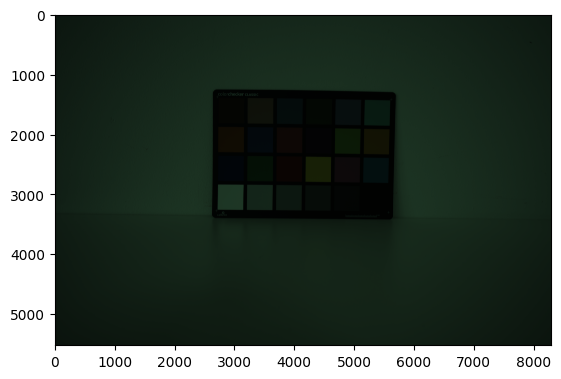

In [96]:
file_raw_0013i =  ["data", "NikonZ7ii", "Indoor", "SPD33", "INDIGO_2022-05-25_Z7ii-A_0013.NEF"]
path_raw_0013i = os.path.join(*file_raw_0013i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [17, 30, 00]], "ColourChecker": "CCC", "Illuminant": SPD33, "Observer":2}
image_0013i = RawImage(path_raw_0013i, metadata, method="postprocess")

image_0013i.show(method="matplotlib")

RAW RGB data extraction

In [97]:
has_colourchecker, corners, size_rect = image_0013i.automatic_colourchecker_extraction(checker_name="CCC", opencv_descriptor="SIFT")

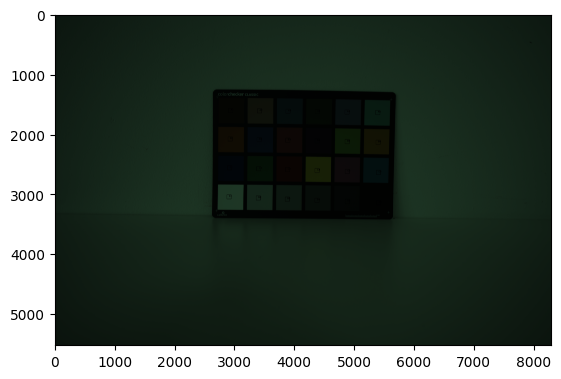

In [98]:
image_0013i.show_colourchecker(checker_name="CCC", show_image=True, method="matplotlib")

In [99]:
CCC_RGB_SPD33 = image_0013i.get_ColourCheckerRGB("CCC").as_pandas_dataframe()

In [100]:
data_ccc_spd33 = pd.merge(CCC_XYZ_SPD33, CCC_RGB_SPD33, on="patch_id")
data_ccc_spd33.insert(0, "ColourChecker", "CCC")
data_ccc_spd33

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD33.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD33.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD33.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD33.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD33.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD33.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD33.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD33.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD33.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD33.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD33.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD33.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD33.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD33.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD33.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD33.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD33.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD33.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD33.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD33.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD33.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD33.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD33.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD33.   

            X          Y          Z  \
0   14.810069  11.957376   2.658178   
1   46.672205  37.508726   9.330850   
2   18.037622  17.937216  13.055637   
3   13.202651  14.033512   2.718351   
4   26.115610  22.955868  16.562618   
5   33.480277  40.006290  17.034544   
6   52.097422  37.918023   2.551375   
7   11.518384  10.484846  14.825391   
8   37.297774  23.402077   5.003963   
9    9.121436   6.654526   5.340620   
10  42.331097  46.172678   4.648822   
11  61.014427  49.960610   3.140940   
12   6.284866   5.340244  10.710924   
13  16.909154  22.453822   3.980820   
14  27.343388  15.810364   2.051383   
15  73.563512  66.821105   3.851295   
16  35.518474  22.596545  11.415275   
17  12.885247  16.450420  14.946843   
18  98.133762  92.111658  35.438705   
19  64.364253  60.730331  24.019404   
20  39.971672  37.771479  15.051175   
21  21.500148  20.233208   7.964612   
22  10.142196   9.592120   3.874621   
23   3.617513   3.402519   1.365858   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD33.   284.917052   336.506944   
1   MeasuredIlluminant object: Illuminant SPD33.   915.516590  1084.970293   
2   MeasuredIlluminant object: Illuminant SPD33.   315.708333   774.212963   
3   MeasuredIlluminant object: Illuminant SPD33.   234.298611   507.301698   
4   MeasuredIlluminant object: Illuminant SPD33.   504.746914   929.574074   
5   MeasuredIlluminant object: Illuminant SPD33.   544.718943  1702.822917   
6   MeasuredIlluminant object: Illuminant SPD33.  1037.553241   773.715664   
7   MeasuredIlluminant object: Illuminant SPD33.   214.503086   574.387346   
8   MeasuredIlluminant object: Illuminant SPD33.   853.086420   497.242284   
9   MeasuredIlluminant object: Illuminant SPD33.   202.274306   246.763696   
10  MeasuredIlluminant object: Illuminant SPD33.   755.292438  1622.703704   
11  MeasuredIlluminant object: Illuminant SPD33.  1179.927855  1212.849537   
12  MeasuredIlluminant object: Illuminant SPD33.   119.854552   341.381559   
13  MeasuredIlluminant object: Illuminant SPD33.   303.9880

In [101]:
data_spd33.append(data_ccc_spd33)

### WPP

White - D1

In [102]:
patch_max = find_patch_max_value(data_ccc_spd33)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [103]:
data_ccc_spd33 = apply_wpp(data_ccc_spd33, "D1")
data_ccc_spd33

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD33.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD33.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD33.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD33.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD33.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD33.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD33.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD33.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD33.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD33.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD33.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD33.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD33.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD33.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD33.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD33.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD33.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD33.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD33.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD33.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD33.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD33.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD33.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD33.   

           X         Y         Z  \
0   0.150917  0.129814  0.075008   
1   0.475598  0.407209  0.263295   
2   0.183806  0.194733  0.368401   
3   0.134537  0.152353  0.076706   
4   0.266123  0.249218  0.467360   
5   0.341170  0.434324  0.480676   
6   0.530882  0.411653  0.071994   
7   0.117374  0.113828  0.418339   
8   0.380071  0.254062  0.141200   
9   0.092949  0.072244  0.150700   
10  0.431361  0.501269  0.131179   
11  0.621748  0.542392  0.088630   
12  0.064044  0.057976  0.302238   
13  0.172307  0.243767  0.112330   
14  0.278634  0.171643  0.057885   
15  0.749625  0.725436  0.108675   
16  0.361939  0.245317  0.322113   
17  0.131303  0.178592  0.421766   
18  1.000000  1.000000  1.000000   
19  0.655883  0.659312  0.677773   
20  0.407318  0.410062  0.424710   
21  0.219090  0.219660  0.224743   
22  0.103351  0.104136  0.109333   
23  0.036863  0.036939  0.038541   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD33.  0.148651  0.096539  0.077703  
1   MeasuredIlluminant object: Illuminant SPD33.  0.477655  0.311263  0.268292  
2   MeasuredIlluminant object: Illuminant SPD33.  0.164715  0.222111  0.317321  
3   MeasuredIlluminant object: Illuminant SPD33.  0.122241  0.145538  0.089899  
4   MeasuredIlluminant object: Illuminant SPD33.  0.263343  0.266682  0.394914  
5   MeasuredIlluminant object: Illuminant SPD33.  0.284198  0.488516  0.477435  
6   MeasuredIlluminant object: Illuminant SPD33.  0.541325  0.221968  0.091548  
7   MeasuredIlluminant object: Illuminant SPD33.  0.111913  0.164784  0.345689  
8   MeasuredIlluminant object: Illuminant SPD33.  0.445083  0.142652  0.137182  
9   MeasuredIlluminant object: Illuminant SPD33.  0.105533  0.070793  0.123442  
10  MeasuredIlluminant object: Illuminant SPD33.  0.394061  0.465531  0.189596  
11  MeasuredIlluminant object: Illuminant SPD33.  0.615607  0.347950  0.114207  
12  MeasuredIlluminant object: Illuminant SPD33.  0.062532  0.097938  0.244104  
13  MeasuredIlluminant object: Illuminant SPD33.  0.158600  0.294077  0.161471  
14  Measure

In [104]:
data_ccc_spd33.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.329454   0.313164   0.272233   0.335273   0.289488   0.270146
std     0.245144   0.238870   0.232168   0.251641   0.226903   0.222145
min     0.036863   0.036939   0.038541   0.038611   0.039243   0.040614
25%     0.133729   0.146718   0.103664   0.121137   0.133323   0.112610
50%     0.272378   0.244542   0.187722   0.273770   0.224237   0.208846
75%     0.442420   0.417321   0.419196   0.453226   0.368167   0.357995
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [105]:
data_wpp_spd33.append(data_ccc_spd33)

### CCPPV

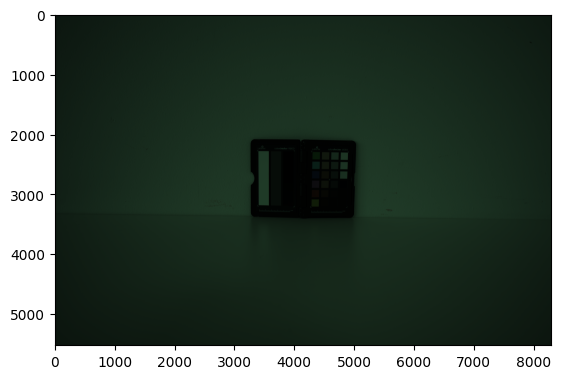

In [106]:
file_raw_0016i =  ["data", "NikonZ7ii", "Indoor", "SPD33", "INDIGO_2022-05-25_Z7ii-A_0016.NEF"]
path_raw_0016i = os.path.join(*file_raw_0016i)

metadata = {"Camera": "Nikon D5600", "Date": [[2022, 5, 25], [17, 30, 00]], "ColourChecker": "CCPPV", "Illuminant": SPD33, "Observer":2}
image_0016i = RawImage(path_raw_0016i, metadata, method="postprocess")

image_0016i.show(method="matplotlib")

RAW RGB data extraction

In [107]:
has_colourchecker, corners, size_rect = image_0016i.automatic_colourchecker_extraction(checker_name="CCPPV_24", opencv_descriptor="SIFT") # Fails

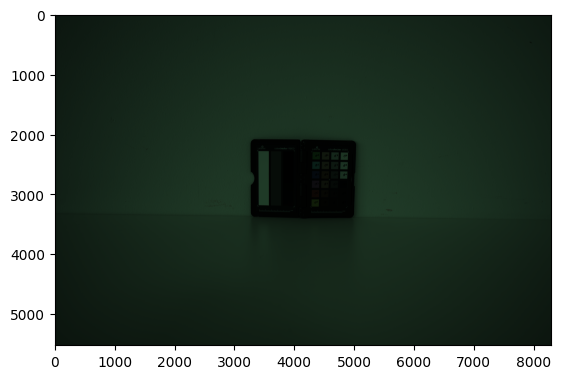

In [108]:
image_0016i.show_colourchecker(checker_name="CCPPV", show_image=True, method="matplotlib")

In [109]:
CCPPV_RGB_SPD33 = image_0016i.get_ColourCheckerRGB("CCPPV").as_pandas_dataframe()

In [110]:
data_ccppv_spd33 = pd.merge(CCPPV_XYZ_SPD33, CCPPV_RGB_SPD33, on="patch_id")
data_ccppv_spd33.insert(0, "ColourChecker", "CCPPV")
data_ccppv_spd33

ColourChecker patch_id                                  illuminant_x  \
0          CCPPV       A1  MeasuredIlluminant object: Illuminant SPD33.   
1          CCPPV       A2  MeasuredIlluminant object: Illuminant SPD33.   
2          CCPPV       A3  MeasuredIlluminant object: Illuminant SPD33.   
3          CCPPV       A4  MeasuredIlluminant object: Illuminant SPD33.   
4          CCPPV       A5  MeasuredIlluminant object: Illuminant SPD33.   
5          CCPPV       A6  MeasuredIlluminant object: Illuminant SPD33.   
6          CCPPV       B1  MeasuredIlluminant object: Illuminant SPD33.   
7          CCPPV       B2  MeasuredIlluminant object: Illuminant SPD33.   
8          CCPPV       B3  MeasuredIlluminant object: Illuminant SPD33.   
9          CCPPV       B4  MeasuredIlluminant object: Illuminant SPD33.   
10         CCPPV       B5  MeasuredIlluminant object: Illuminant SPD33.   
11         CCPPV       B6  MeasuredIlluminant object: Illuminant SPD33.   
12         CCPPV       C1  MeasuredIlluminant object: Illuminant SPD33.   
13         CCPPV       C2  MeasuredIlluminant object: Illuminant SPD33.   
14         CCPPV       C3  MeasuredIlluminant object: Illuminant SPD33.   
15         CCPPV       C4  MeasuredIlluminant object: Illuminant SPD33.   
16         CCPPV       C5  MeasuredIlluminant object: Illuminant SPD33.   
17         CCPPV       C6  MeasuredIlluminant object: Illuminant SPD33.   
18         CCPPV       D1  MeasuredIlluminant object: Illuminant SPD33.   
19         CCPPV       D2  MeasuredIlluminant object: Illuminant SPD33.   
20         CCPPV       D3  MeasuredIlluminant object: Illuminant SPD33.   
21         CCPPV       D4  MeasuredIlluminant object: Illuminant SPD33.   
22         CCPPV       D5  MeasuredIlluminant object: Illuminant SPD33.   
23         CCPPV       D6  MeasuredIlluminant object: Illuminant SPD33.   

            X          Y          Z  \
0   40.961836  40.324934   4.904443   
1   29.571276  19.892247   3.888537   
2   27.070143  18.717404  12.611240   
3   10.297661   8.867585  11.361606   
4   22.821324  26.756290  14.350746   
5   24.612109  32.225573   5.578524   
6    7.161217   6.180061   1.621409   
7   15.655555  12.801340   2.713688   
8   27.693774  23.668897   6.065341   
9   24.423405  20.379588   4.572725   
10  38.906900  33.491461   9.237568   
11  43.762951  37.964300  10.883021   
12   4.688676   4.405457   1.755963   
13   6.554347   6.169715   2.493841   
14  13.654571  12.808906   5.096099   
15  20.888661  19.662717   7.747408   
16  34.418884  32.348368  12.973589   
17  52.607950  49.471123  19.807640   
18   3.621931   3.415683   1.381797   
19   3.157740   2.973038   1.196327   
20   4.893315   4.604636   1.890517   
21  79.041131  74.325098  29.426338   
22  80.625392  75.857748  29.787654   
23  83.329925  78.266447  29.976967   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD33.  1055.698347  1831.000000   
1   MeasuredIlluminant object: Illuminant SPD33.   833.376033   513.690083   
2   MeasuredIlluminant object: Illuminant SPD33.   858.138430   834.055785   
3   MeasuredIlluminant object: Illuminant SPD33.   282.268595   622.053719   
4   MeasuredIlluminant object: Illuminant SPD33.   609.227273  1986.807851   
5   MeasuredIlluminant object: Illuminant SPD33.   463.169421  1556.863636   
6   MeasuredIlluminant object: Illuminant SPD33.   158.479339   218.247934   
7   MeasuredIlluminant object: Illuminant SPD33.   411.940083   458.311983   
8   MeasuredIlluminant object: Illuminant SPD33.   824.223140  1092.809917   
9   MeasuredIlluminant object: Illuminant SPD33.   677.855372   818.413223   
10  MeasuredIlluminant object: Illuminant SPD33.   985.185950  1378.516529   
11  MeasuredIlluminant object: Illuminant SPD33.  1071.359504  1527.425620   
12  MeasuredIlluminant object: Illuminant SPD33.    96.628099   178.285124   
13  MeasuredIlluminant object: Illuminant SPD33.   132.1900

In [111]:
data_spd33.append(data_ccppv_spd33)

### WPP

White - D6

In [112]:
patch_max = find_patch_max_value(data_ccppv_spd33)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D6', 'D6', 'D6']
['D6', 'D6', 'D6']


In [113]:
data_ccppv_spd33 = apply_wpp(data_ccppv_spd33, "D6")
data_ccppv_spd33

ColourChecker patch_id                                  illuminant_x  \
0          CCPPV       A1  MeasuredIlluminant object: Illuminant SPD33.   
1          CCPPV       A2  MeasuredIlluminant object: Illuminant SPD33.   
2          CCPPV       A3  MeasuredIlluminant object: Illuminant SPD33.   
3          CCPPV       A4  MeasuredIlluminant object: Illuminant SPD33.   
4          CCPPV       A5  MeasuredIlluminant object: Illuminant SPD33.   
5          CCPPV       A6  MeasuredIlluminant object: Illuminant SPD33.   
6          CCPPV       B1  MeasuredIlluminant object: Illuminant SPD33.   
7          CCPPV       B2  MeasuredIlluminant object: Illuminant SPD33.   
8          CCPPV       B3  MeasuredIlluminant object: Illuminant SPD33.   
9          CCPPV       B4  MeasuredIlluminant object: Illuminant SPD33.   
10         CCPPV       B5  MeasuredIlluminant object: Illuminant SPD33.   
11         CCPPV       B6  MeasuredIlluminant object: Illuminant SPD33.   
12         CCPPV       C1  MeasuredIlluminant object: Illuminant SPD33.   
13         CCPPV       C2  MeasuredIlluminant object: Illuminant SPD33.   
14         CCPPV       C3  MeasuredIlluminant object: Illuminant SPD33.   
15         CCPPV       C4  MeasuredIlluminant object: Illuminant SPD33.   
16         CCPPV       C5  MeasuredIlluminant object: Illuminant SPD33.   
17         CCPPV       C6  MeasuredIlluminant object: Illuminant SPD33.   
18         CCPPV       D1  MeasuredIlluminant object: Illuminant SPD33.   
19         CCPPV       D2  MeasuredIlluminant object: Illuminant SPD33.   
20         CCPPV       D3  MeasuredIlluminant object: Illuminant SPD33.   
21         CCPPV       D4  MeasuredIlluminant object: Illuminant SPD33.   
22         CCPPV       D5  MeasuredIlluminant object: Illuminant SPD33.   
23         CCPPV       D6  MeasuredIlluminant object: Illuminant SPD33.   

           X         Y         Z  \
0   0.491562  0.515226  0.163607   
1   0.354870  0.254161  0.129718   
2   0.324855  0.239150  0.420698   
3   0.123577  0.113300  0.379011   
4   0.273867  0.341862  0.478726   
5   0.295357  0.411742  0.186094   
6   0.085938  0.078962  0.054088   
7   0.187874  0.163561  0.090526   
8   0.332339  0.302414  0.202333   
9   0.293093  0.260387  0.152541   
10  0.466902  0.427916  0.308156   
11  0.525177  0.485065  0.363046   
12  0.056266  0.056288  0.058577   
13  0.078655  0.078830  0.083192   
14  0.163862  0.163658  0.170000   
15  0.250674  0.251228  0.258445   
16  0.413044  0.413311  0.432785   
17  0.631321  0.632086  0.660762   
18  0.043465  0.043642  0.046095   
19  0.037894  0.037986  0.039908   
20  0.058722  0.058833  0.063066   
21  0.948532  0.949642  0.981632   
22  0.967544  0.969224  0.993685   
23  1.000000  1.000000  1.000000   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD33.  0.565267  0.538615  0.243243  
1   MeasuredIlluminant object: Illuminant SPD33.  0.446226  0.151109  0.128610  
2   MeasuredIlluminant object: Illuminant SPD33.  0.459484  0.245349  0.443563  
3   MeasuredIlluminant object: Illuminant SPD33.  0.151139  0.182986  0.405305  
4   MeasuredIlluminant object: Illuminant SPD33.  0.326207  0.584448  0.665047  
5   MeasuredIlluminant object: Illuminant SPD33.  0.248001  0.457973  0.245223  
6   MeasuredIlluminant object: Illuminant SPD33.  0.084857  0.064201  0.054099  
7   MeasuredIlluminant object: Illuminant SPD33.  0.220571  0.134819  0.095810  
8   MeasuredIlluminant object: Illuminant SPD33.  0.441325  0.321465  0.257310  
9   MeasuredIlluminant object: Illuminant SPD33.  0.362953  0.240748  0.176307  
10  MeasuredIlluminant object: Illuminant SPD33.  0.527511  0.405510  0.353998  
11  MeasuredIlluminant object: Illuminant SPD33.  0.573652  0.449314  0.387035  
12  MeasuredIlluminant object: Illuminant SPD33.  0.051739  0.052445  0.055806  
13  MeasuredIlluminant object: Illuminant SPD33.  0.070780  0.072183  0.075078  
14  Measure

In [114]:
data_ccppv_spd33.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.350225   0.343686   0.321529   0.378103   0.353707   0.343803
std     0.291213   0.293399   0.304863   0.291977   0.298179   0.304485
min     0.037894   0.037986   0.039908   0.029595   0.030812   0.032789
25%     0.114167   0.104715   0.088692   0.134568   0.119160   0.090627
50%     0.294225   0.257274   0.194214   0.344580   0.261623   0.251266
75%     0.473067   0.442203   0.423720   0.536950   0.479983   0.450464
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [115]:
data_wpp_spd33.append(data_ccppv_spd33)

### XRCCPP

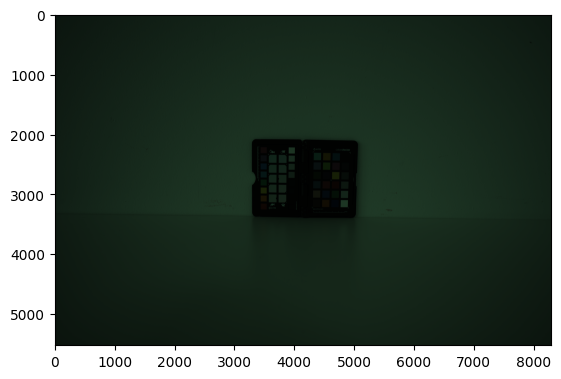

In [116]:
file_raw_0017i =  ["data", "NikonZ7ii", "Indoor", "SPD33", "INDIGO_2022-05-25_Z7ii-A_0017.NEF"]
path_raw_0017i = os.path.join(*file_raw_0017i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [17, 30, 00]], "ColourChecker": "XRCCPP", "Illuminant": SPD33, "Observer":2}
image_0017i = RawImage(path_raw_0017i, metadata, method="postprocess")

image_0017i.show(method="matplotlib")

RAW RGB data extraction

In [117]:
has_colourchecker, corners, size_rect = image_0017i.automatic_colourchecker_extraction(checker_name="XRCCPP_24", opencv_descriptor="SIFT")

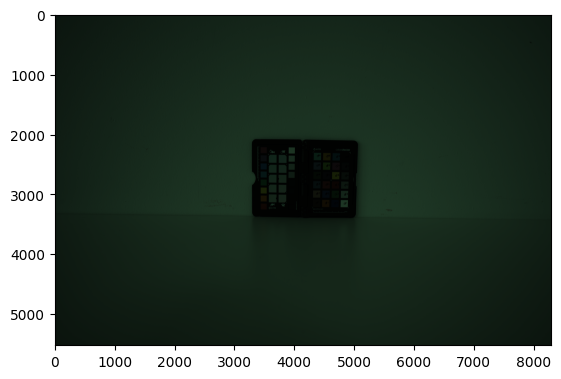

In [118]:
image_0017i.show_colourchecker(checker_name="XRCCPP", show_image=True, method="matplotlib")

In [119]:
XRCCPP_RGB_SPD33 = image_0017i.get_ColourCheckerRGB("XRCCPP").as_pandas_dataframe()

In [120]:
data_xrccpp_spd33 = pd.merge(XRCCPP_XYZ_SPD33, XRCCPP_RGB_SPD33, on="patch_id")
data_xrccpp_spd33.insert(0, "ColourChecker", "XRCCPP")
data_xrccpp_spd33

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD33.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD33.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD33.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD33.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD33.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD33.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD33.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD33.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD33.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD33.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD33.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD33.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD33.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD33.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD33.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD33.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD33.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD33.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD33.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD33.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD33.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD33.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD33.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD33.   

            X          Y          Z  \
0   14.195419  11.543488   2.605551   
1   44.756082  35.574373   8.797672   
2   15.985468  15.872967  11.448365   
3   12.060562  12.767522   2.585386   
4   22.662302  20.184526  14.242986   
5   31.319427  37.783751  16.370447   
6   48.599054  35.518561   2.470849   
7   11.340106  10.308518  14.234636   
8   35.563578  22.268140   4.821201   
9    8.584028   6.335366   5.056607   
10  37.918036  41.211329   4.220968   
11  54.705121  45.115403   2.959676   
12   5.650461   4.921847   8.197895   
13  15.767722  20.711598   3.753607   
14  25.236793  14.510878   1.881830   
15  63.838887  58.339316   3.485840   
16  32.177806  20.486242  10.279983   
17  11.997085  15.280746  13.844049   
18  85.797589  80.561178  30.499720   
19  59.192258  55.783540  22.016397   
20  35.911263  33.910150  13.465977   
21  20.035350  18.890485   7.434471   
22   8.538109   8.096514   3.319225   
23   3.523082   3.326570   1.373356   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD33.   311.859504   371.991736   
1   MeasuredIlluminant object: Illuminant SPD33.  1021.000000  1178.314050   
2   MeasuredIlluminant object: Illuminant SPD33.   348.574380   849.665289   
3   MeasuredIlluminant object: Illuminant SPD33.   256.710744   548.921488   
4   MeasuredIlluminant object: Illuminant SPD33.   529.609504  1000.820248   
5   MeasuredIlluminant object: Illuminant SPD33.   573.789256  1841.553719   
6   MeasuredIlluminant object: Illuminant SPD33.  1113.559917   835.626033   
7   MeasuredIlluminant object: Illuminant SPD33.   228.400826   611.793388   
8   MeasuredIlluminant object: Illuminant SPD33.   880.330579   505.103306   
9   MeasuredIlluminant object: Illuminant SPD33.   220.103306   277.297521   
10  MeasuredIlluminant object: Illuminant SPD33.   804.564050  1726.842975   
11  MeasuredIlluminant object: Illuminant SPD33.  1226.537190  1300.983471   
12  MeasuredIlluminant object: Illuminant SPD33.   118.774793   355.438017   
13  MeasuredIlluminant object: Illuminant SPD33.   304.2933

In [121]:
data_spd33.append(data_xrccpp_spd33)

### WPP

White - D1

In [122]:
patch_max = find_patch_max_value(data_xrccpp_spd33)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [123]:
data_xrccpp_spd33 = apply_wpp(data_xrccpp_spd33, "D1")
data_xrccpp_spd33

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD33.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD33.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD33.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD33.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD33.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD33.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD33.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD33.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD33.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD33.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD33.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD33.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD33.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD33.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD33.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD33.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD33.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD33.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD33.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD33.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD33.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD33.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD33.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD33.   

           X         Y         Z  \
0   0.165452  0.143288  0.085429   
1   0.521647  0.441582  0.288451   
2   0.186316  0.197030  0.375360   
3   0.140570  0.158482  0.084768   
4   0.264137  0.250549  0.466987   
5   0.365039  0.469007  0.536741   
6   0.566438  0.440889  0.081012   
7   0.132173  0.127959  0.466714   
8   0.414506  0.276413  0.158074   
9   0.100050  0.078640  0.165792   
10  0.441948  0.511553  0.138394   
11  0.637607  0.560014  0.097039   
12  0.065858  0.061095  0.268786   
13  0.183778  0.257092  0.123070   
14  0.294143  0.180122  0.061700   
15  0.744064  0.724162  0.114291   
16  0.375043  0.254294  0.337052   
17  0.139830  0.189679  0.453907   
18  1.000000  1.000000  1.000000   
19  0.689906  0.692437  0.721856   
20  0.418558  0.420924  0.441511   
21  0.233519  0.234486  0.243755   
22  0.099515  0.100501  0.108828   
23  0.041063  0.041292  0.045028   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD33.  0.162790  0.106416  0.086701  
1   MeasuredIlluminant object: Illuminant SPD33.  0.532959  0.337081  0.301105  
2   MeasuredIlluminant object: Illuminant SPD33.  0.181955  0.243064  0.347449  
3   MeasuredIlluminant object: Illuminant SPD33.  0.134002  0.157030  0.100602  
4   MeasuredIlluminant object: Illuminant SPD33.  0.276455  0.286305  0.423754  
5   MeasuredIlluminant object: Illuminant SPD33.  0.299516  0.526814  0.523018  
6   MeasuredIlluminant object: Illuminant SPD33.  0.581275  0.239048  0.098860  
7   MeasuredIlluminant object: Illuminant SPD33.  0.119225  0.175016  0.369952  
8   MeasuredIlluminant object: Illuminant SPD33.  0.459530  0.144495  0.142653  
9   MeasuredIlluminant object: Illuminant SPD33.  0.114893  0.079327  0.136494  
10  MeasuredIlluminant object: Illuminant SPD33.  0.419980  0.493999  0.206439  
11  MeasuredIlluminant object: Illuminant SPD33.  0.640249  0.372173  0.131172  
12  MeasuredIlluminant object: Illuminant SPD33.  0.062000  0.101680  0.267637  
13  MeasuredIlluminant object: Illuminant SPD33.  0.158840  0.292193  0.165343  
14  Measure

In [124]:
data_xrccpp_spd33.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.342548   0.325479   0.286023   0.344117   0.297742   0.281494
std     0.248351   0.241295   0.237739   0.251678   0.226432   0.222868
min     0.041063   0.041292   0.045028   0.042450   0.043833   0.046399
25%     0.140385   0.154684   0.105881   0.130909   0.135457   0.126472
50%     0.279140   0.252422   0.204774   0.287986   0.241056   0.216604
75%     0.461873   0.448438   0.444610   0.477887   0.384974   0.383403
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [125]:
data_wpp_spd33.append(data_xrccpp_spd33)

### SCK100

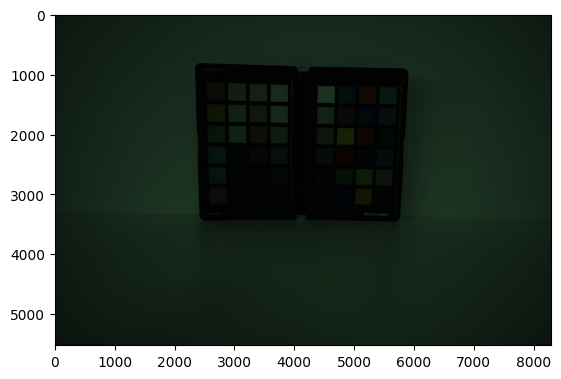

In [126]:
file_raw_0015i =  ["data", "NikonZ7ii", "Indoor", "SPD33", "INDIGO_2022-05-25_Z7ii-A_0015.NEF"]
path_raw_0015i = os.path.join(*file_raw_0015i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [17, 30, 00]], "ColourChecker": "SCK100", "Illuminant": SPD33, "Observer":2}
image_0015i = RawImage(path_raw_0015i, metadata, method="postprocess")

image_0015i.show(method="matplotlib")

RAW RGB data extraction

In [127]:
has_colourchecker, corners, size_rect = image_0015i.automatic_colourchecker_extraction(checker_name="SCK100_48", opencv_descriptor="SIFT")

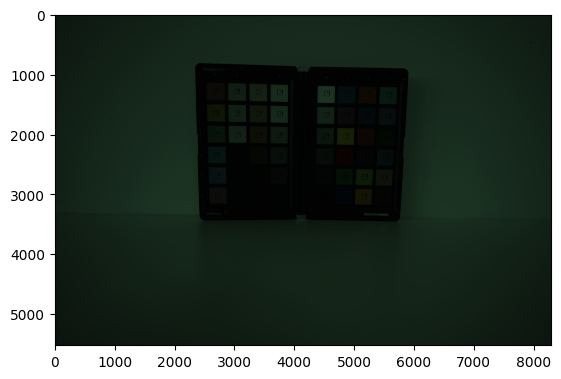

In [128]:
image_0015i.show_colourchecker(checker_name="SCK100", show_image=True, method="matplotlib")

In [129]:
SCK100_RGB_SPD33 = image_0015i.get_ColourCheckerRGB("SCK100").as_pandas_dataframe()

In [130]:
data_sck100_spd33 = pd.merge(SCK100_XYZ_SPD33, SCK100_RGB_SPD33, on="patch_id")
data_sck100_spd33.insert(0, "ColourChecker", "SCK100")
data_sck100_spd33

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD33.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD33.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD33.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD33.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD33.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD33.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD33.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD33.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD33.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD33.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD33.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD33.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD33.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD33.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD33.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD33.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD33.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD33.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD33.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD33.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD33.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD33.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD33.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD33.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD33.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD33.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD33.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD33.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD33.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD33.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD33.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD33.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD33.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD33.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD33.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD33.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD33.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD33.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD33.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD33.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD33.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD33.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD33.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD33.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD33.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD33.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD33.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD33.   

            X          Y          Z  \
0   44.153180  32.655066   7.612774   
1   57.042396  51.441862   6.507730   
2   30.426425  34.388600   8.504729   
3   24.023500  27.417447  18.238126   
4   25.958590  25.711313  19.786136   
5   39.795146  29.433642  12.189260   
6   66.105120  60.603505  22.890505   
7   62.322916  

In [131]:
data_spd33.append(data_sck100_spd33)

### WPP

White - E1

In [132]:
patch_max = find_patch_max_value(data_sck100_spd33)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E1', 'E1', 'E1']
['E1', 'E1', 'E1']


In [133]:
data_sck100_spd33 = apply_wpp(data_sck100_spd33, "E1")
data_sck100_spd33

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD33.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD33.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD33.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD33.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD33.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD33.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD33.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD33.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD33.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD33.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD33.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD33.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD33.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD33.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD33.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD33.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD33.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD33.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD33.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD33.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD33.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD33.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD33.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD33.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD33.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD33.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD33.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD33.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD33.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD33.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD33.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD33.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD33.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD33.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD33.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD33.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD33.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD33.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD33.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD33.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD33.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD33.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD33.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD33.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD33.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD33.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD33.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD33.   

           X         Y         Z  \
0   0.461241  0.364350  0.219900   
1   0.595886  0.573964  0.187980   
2   0.317846  0.383692  0.245665   
3   0.250958  0.305911  0.526820   
4   0.271173  0.286875  0.571535   
5   0.415715  0.328407  0.352095   
6   0.690559  0.676185  0.661207   
7   0.651048  0.666252  0.648709   
8  

In [134]:
data_sck100_spd33.describe()

X          Y          Z          R          G          B
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000
mean    0.358888   0.345990   0.304446   0.365836   0.325400   0.304430
std     0.259341   0.253637   0.249512   0.260115   0.238899   0.237333
min     0.046778   0.046988   0.048292   0.041718   0.042553   0.043312
25%     0.124764   0.137803   0.085930   0.116943   0.125318   0.101670
50%     0.301257   0.286029   0.232782   0.291580   0.280121   0.250090
75%     0.525939   0.516434   0.458490   0.546108   0.467846   0.435480
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [135]:
data_wpp_spd33.append(data_sck100_spd33)

## Merge data

In [136]:
data_pd_spd33 = pd.concat(data_spd33, ignore_index=True)

data_pd_spd33 = data_pd_spd33.drop(columns="illuminant_y")
data_pd_spd33 = data_pd_spd33.rename(columns={"illuminant_x":"illuminant"})
data_pd_spd33["illuminant"] = "SPD33" # as str to avoid error
data_pd_spd33

ColourChecker patch_id illuminant          X          Y          Z  \
0           CCDSG       B2      SPD33  19.147955  11.916876   5.501931   
1           CCDSG       B3      SPD33  42.878052  33.678849  18.183212   
2           CCDSG       B4      SPD33  15.259572  10.006759   9.821045   
3           CCDSG       B5      SPD33  15.702739  17.515753  22.066762   
4           CCDSG       B6      SPD33  22.630767  27.337169  20.627042   
..            ...      ...        ...        ...        ...        ...   
211        SCK100       H2      SPD33  25.440391  22.752045  16.195002   
212        SCK100       H3      SPD33  11.963694  12.913219   2.639714   
213        SCK100       H4      SPD33  17.231752  17.484302  12.491969   
214        SCK100       H5      SPD33  45.362678  36.716182   9.041996   
215        SCK100       H6      SPD33  13.291741  10.663063   2.443196   

               R            G            B  
0     400.515625   254.046631   272.996582  
1     835.282959  1082.458496  1030.410645  
2     295.374023   279.744629   466.678223  
3     248.094238  1016.634766  1298.463379  
4     384.840820  1465.655273  1359.938477  
..           ...          ...          ...  
211   475.185658   909.291667   932.362812  
212   208.750283   469.344955   186.575680  
213   311.667234   804.149093   771.801020  
214  1002.172052  1186.418934   689.988662  
215   280.246315   298.257086   155.728741  

[216 rows x 9 columns]

In [137]:
data_pd_wpp_spd33 = pd.concat(data_wpp_spd33, ignore_index=True)

data_pd_wpp_spd33 = data_pd_wpp_spd33.drop(columns="illuminant_y")
data_pd_wpp_spd33 = data_pd_wpp_spd33.rename(columns={"illuminant_x":"illuminant"})
data_pd_wpp_spd33["illuminant"] = "SPD33" # as str to avoid error
data_pd_wpp_spd33

ColourChecker patch_id illuminant         X         Y         Z         R  \
0           CCDSG       B2      SPD33  0.197731  0.131137  0.157114  0.210311   
1           CCDSG       B3      SPD33  0.442779  0.370612  0.519241  0.438607   
2           CCDSG       B4      SPD33  0.157577  0.110117  0.280450  0.155101   
3           CCDSG       B5      SPD33  0.162154  0.192748  0.630140  0.130274   
4           CCDSG       B6      SPD33  0.233696  0.300826  0.589027  0.202080   
..            ...      ...        ...       ...       ...       ...       ...   
211        SCK100       H2      SPD33  0.265760  0.253857  0.467803  0.267118   
212        SCK100       H3      SPD33  0.124977  0.144080  0.076250  0.117346   
213        SCK100       H4      SPD33  0.180009  0.195082  0.360839  0.175199   
214        SCK100       H5      SPD33  0.473875  0.409662  0.261184  0.563355   
215        SCK100       H6      SPD33  0.138850  0.118973  0.070573  0.157536   

            G         B  
0    0.072819  0.114646  
1    0.310273  0.432724  
2    0.080185  0.195983  
3    0.291406  0.545293  
4    0.420112  0.571110  
..        ...       ...  
211  0.281013  0.420533  
212  0.145049  0.084153  
213  0.248519  0.348114  
214  0.366658  0.311213  
215  0.092175  0.070240  

[216 rows x 9 columns]

## Outdoor

In [138]:
data_spd38 = []
data_wpp_spd38 = []

## SPD38

| Image                             |  Illuminant  | ColourChecker                        | Patches |
|-----------------------------------|--------------|--------------------------------------|---------|
| INDIGO_2022-05-26_Z7ii-A_0002.NEF | SPD38-5557ºK | CCDSG  - Calibrite DIGITAL SG        | 140     |
| INDIGO_2022-05-26_Z7ii-A_0001.NEF | SPD38-5557ºK | CCC - Calibrite Classic              | 24      |
| INDIGO_2022-05-26_Z7ii-A_0004.NEF | SPD38-5557ºK | CCPPV - Calibrite PASSPORT VIDEO     | 24      |
| INDIGO_2022-05-26_Z7ii-A_0005.NEF | SPD38-5557ºK | XRCCPP - X-rite PASSPORT PHOTO       | 24      |
| INDIGO_2022-05-26_Z7ii-A_0003.NEF | SPD38-5557ºK | SCK100 - SpyderCHECKR                | 48      |

<img src="res/screenshot/NikonZ7ii/SPD38/INDIGO_2022-05-26_Z7ii-A_0002.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD38/INDIGO_2022-05-26_Z7ii-A_0001.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD38/INDIGO_2022-05-26_Z7ii-A_0004.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD38/INDIGO_2022-05-26_Z7ii-A_0005.jpg" width="400">
<img src="res/screenshot/NikonZ7ii/SPD38/INDIGO_2022-05-26_Z7ii-A_0003.jpg" width="400">

## SPD Illuminant

SPD38

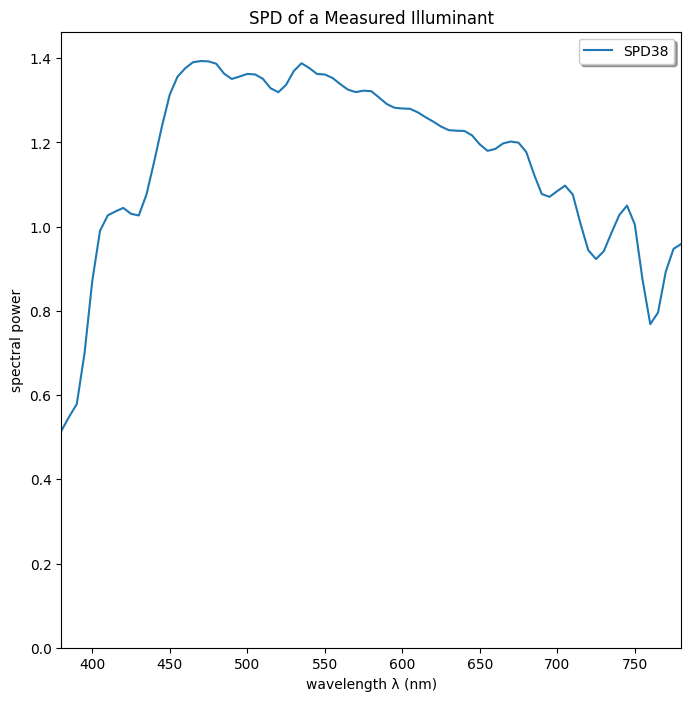

In [139]:
file_spd = ["res", "spd", "INDIGO-C7000-A_038_02°_5557K.csv"]
path_spd = os.path.join(*file_spd)

SPD38 = MeasuredIlluminant(illuminant_name="SPD38", path_file=path_spd)

SPD38.plot()

XYZ data (under SPD38)

In [140]:
CCDSG_XYZ_SPD38 = CCDSG.to_ColourCheckerXYZ(illuminant=SPD38, observer=2).as_pandas_dataframe()

In [141]:
CCC_XYZ_SPD38 = CCC.to_ColourCheckerXYZ(illuminant=SPD38, observer=2).as_pandas_dataframe()

In [142]:
CCPPV_XYZ_SPD38 = CCPPV.to_ColourCheckerXYZ(illuminant=SPD38, observer=2).as_pandas_dataframe()

In [143]:
XRCCPP_XYZ_SPD38 = XRCCPP.to_ColourCheckerXYZ(illuminant=SPD38, observer=2).as_pandas_dataframe()

In [144]:
SCK100_XYZ_SPD38 = SCK100.to_ColourCheckerXYZ(illuminant=SPD38, observer=2).as_pandas_dataframe()

## RawImage

### CCDSG

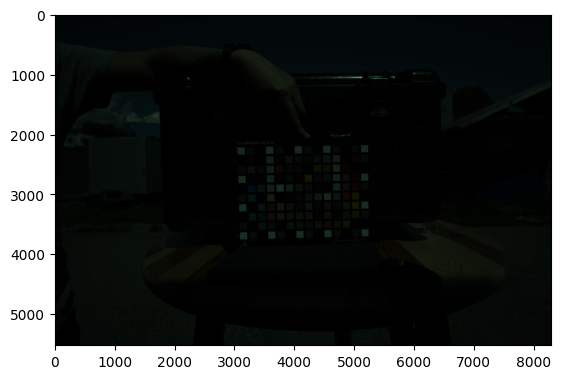

In [146]:
file_raw_0002o =  ["data", "NikonZ7ii", "Outdoor", "SPD38", "INDIGO_2022-05-26_Z7ii-A_0002.NEF"]
path_raw_0002o= os.path.join(*file_raw_0002o)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 26], [14, 15, 00]], "ColourChecker": "CCDSG", "Illuminant": SPD38, "Observer":2}
image_0002o = RawImage(path_raw_0002o, metadata, method="postprocess")

image_0002o.show(method="matplotlib")

RAW RGB data extraction

In [147]:
has_colourchecker, corners, size_rect = image_0002o.automatic_colourchecker_extraction(checker_name="CCDSG", opencv_descriptor="SIFT")

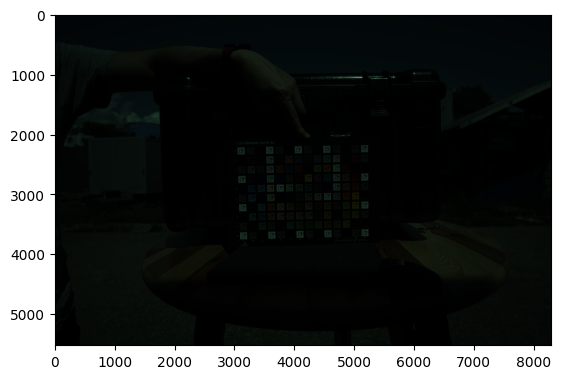

In [148]:
image_0002o.show_colourchecker(checker_name="CCDSG", show_image=True, method="matplotlib")

In [149]:
CCDSG_RGB_SPD38 = image_0002o.get_ColourCheckerRGB("CCDSG").as_pandas_dataframe()

In [150]:
data_ccdsg_spd38 = pd.merge(CCDSG_XYZ_SPD38, CCDSG_RGB_SPD38, on="patch_id")
data_ccdsg_spd38.insert(0, "ColourChecker", "CCDSG")
data_ccdsg_spd38

ColourChecker patch_id                                  illuminant_x  \
0           CCDSG       A1  MeasuredIlluminant object: Illuminant SPD38.   
1           CCDSG       A2  MeasuredIlluminant object: Illuminant SPD38.   
2           CCDSG       A3  MeasuredIlluminant object: Illuminant SPD38.   
3           CCDSG       A4  MeasuredIlluminant object: Illuminant SPD38.   
4           CCDSG       A5  MeasuredIlluminant object: Illuminant SPD38.   
..            ...      ...                                           ...   
135         CCDSG       N6  MeasuredIlluminant object: Illuminant SPD38.   
136         CCDSG       N7  MeasuredIlluminant object: Illuminant SPD38.   
137         CCDSG       N8  MeasuredIlluminant object: Illuminant SPD38.   
138         CCDSG       N9  MeasuredIlluminant object: Illuminant SPD38.   
139         CCDSG      N10  MeasuredIlluminant object: Illuminant SPD38.   

             X          Y          Z  \
0    87.300586  90.859164  85.223169   
1     4.253752   4.393613   4.236990   
2    21.267657  22.091132  21.075288   
3    86.287721  89.800334  84.392373   
4     4.238284   4.378805   4.226200   
..         ...        ...        ...   
135   4.234712   4.375731   4.223337   
136  86.752339  90.284485  84.802768   
137  21.325868  22.150208  21.100860   
138   4.208917   4.348210   4.186358   
139  87.308443  90.864186  85.213431   

                                     illuminant_y            R            G  \
0    MeasuredIlluminant object: Illuminant SPD38.  1393.300412  2502.164609   
1    MeasuredIlluminant object: Illuminant SPD38.    14.425926    25.072016   
2    MeasuredIlluminant object: Illuminant SPD38.   316.568244   564.221536   
3    MeasuredIlluminant object: Illuminant SPD38.  1496.780521  2662.014403   
4    MeasuredIlluminant object: Illuminant SPD38.    13.876200    24.307956   
..                                            ...          ...          ...   
135  MeasuredIlluminant object: Illuminant SPD38.    15.610425    25.385460   
136  MeasuredIlluminant object: Illuminant SPD38.  1620.820302  2820.041152   
137  MeasuredIlluminant object: Illuminant SPD38.   357.089849   619.056241   
138  MeasuredIlluminant object: Illuminant SPD38.    21.956790    31.489026   
139  MeasuredIlluminant object: Illuminant SPD38.  1593.378601  2768.076818   

               B  
0    1930.668724  
1      20.808642  
2     435.560357  
3    2045.594650  
4      20.148491  
..           ...  
135    19.194787  
136  2122.993141  
137   463.185871  
138    20.696845  
139  2085.655693  

[140 rows x 10 columns]

In [151]:
data_ccdsg_spd38 = data_ccdsg_spd38[(data_ccdsg_spd38["patch_id"].str.contains("1")==False) & (data_ccdsg_spd38["patch_id"].str.contains("0")==False) & (data_ccdsg_spd38["patch_id"].str.contains("0")==False) & (data_ccdsg_spd38["patch_id"].str.contains("A")==False) & (data_ccdsg_spd38["patch_id"].str.contains("N")==False)]
data_ccdsg_spd38

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD38.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD38.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD38.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD38.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD38.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD38.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD38.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD38.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD38.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD38.   

             X          Y          Z  \
11   17.019386  10.871192  14.000805   
12   39.099460  32.775758  44.825191   
13   15.293600   9.750916  24.760794   
14   18.983367  21.458387  53.076720   
15   24.444401  31.933887  50.187256   
..         ...        ...        ...   
124  37.788664  22.981807   7.227809   
125  67.116006  60.837795   9.551035   
126  60.092033  61.398777   7.500841   
127  36.953162  44.348139   7.899924   
128   7.228876   6.653069   4.577279   

                                     illuminant_y            R            G  \
11   MeasuredIlluminant object: Illuminant SPD38.   307.319616   142.462277   
12   MeasuredIlluminant object: Illuminant SPD38.   685.875857   853.616941   
13   MeasuredIlluminant object: Illuminant SPD38.   213.211934   169.615226   
14   MeasuredIlluminant object: Illuminant SPD38.   188.825103   823.554870   
15   MeasuredIlluminant object: Illuminant SPD38.   304.474623  1182.124143   
..                                            ...          ...          ...   
124  MeasuredIlluminant object: Illuminant SPD38.   926.995885   277.144033   
125  MeasuredIlluminant object: Illuminant SPD38.  1380.766804  1313.980110   
126  MeasuredIlluminant object: Illuminant SPD38.  1202.709191  1469.056241   
127  MeasuredIlluminant object: Illuminant SPD38.   643.056584  1154.519890   
128  MeasuredIlluminant object: Illuminant SPD38.    90.663923    73.205075   

               B  
11    209.135802  
12    934.073045  
13    390.382716  
14   1190.126200  
15   1231.043210  
..           ...  
124   116.255144  
125   250.323045  
126   221.348422  
127   221.228395  
128    30.851166  

[96 rows x 10 columns]

In [152]:
data_spd38.append(data_ccdsg_spd38)

### WPP

White - E5

In [153]:
patch_max = find_patch_max_value(data_ccdsg_spd38)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E5', 'E5', 'E5']
['E5', 'E5', 'E5']


In [154]:
data_ccdsg_spd38 = apply_wpp(data_ccdsg_spd38, "E5")
data_ccdsg_spd38

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD38.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD38.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD38.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD38.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD38.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD38.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD38.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD38.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD38.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD38.   

            X         Y         Z  \
11   0.194845  0.119592  0.164366   
12   0.447627  0.360561  0.526236   
13   0.175087  0.107268  0.290685   
14   0.217329  0.236061  0.623106   
15   0.279850  0.351300  0.589185   
..        ...       ...       ...   
124  0.432620  0.252820  0.084853   
125  0.768372  0.669268  0.112127   
126  0.687958  0.675439  0.088058   
127  0.423055  0.487867  0.092743   
128  0.082759  0.073189  0.053736   

                                     illuminant_y         R         G  \
11   MeasuredIlluminant object: Illuminant SPD38.  0.199224  0.051682   
12   MeasuredIlluminant object: Illuminant SPD38.  0.444627  0.309675   
13   MeasuredIlluminant object: Illuminant SPD38.  0.138217  0.061533   
14   MeasuredIlluminant object: Illuminant SPD38.  0.122408  0.298769   
15   MeasuredIlluminant object: Illuminant SPD38.  0.197379  0.428850   
..                                            ...       ...       ...   
124  MeasuredIlluminant object: Illuminant SPD38.  0.600936  0.100542   
125  MeasuredIlluminant object: Illuminant SPD38.  0.895099  0.476685   
126  MeasuredIlluminant object: Illuminant SPD38.  0.779671  0.532943   
127  MeasuredIlluminant object: Illuminant SPD38.  0.416869  0.418836   
128  MeasuredIlluminant object: Illuminant SPD38.  0.058774  0.026557   

            B  
11   0.098347  
12   0.439250  
13   0.183578  
14   0.559660  
15   0.578901  
..        ...  
124  0.054669  
125  0.117715  
126  0.104090  
127  0.104033  
128  0.014508  

[96 rows x 10 columns]

In [155]:
data_ccdsg_spd38.describe()

X          Y          Z          R          G          B
count  96.000000  96.000000  96.000000  96.000000  96.000000  96.000000
mean    0.357907   0.343665   0.286503   0.354618   0.298549   0.262555
std     0.224927   0.221862   0.235864   0.254354   0.225073   0.235268
min     0.048401   0.048049   0.049471   0.009131   0.008657   0.009005
25%     0.163854   0.160395   0.098232   0.123025   0.100185   0.077099
50%     0.332046   0.349066   0.212210   0.340455   0.282067   0.188195
75%     0.469160   0.464864   0.414163   0.539242   0.417956   0.369219
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [156]:
data_wpp_spd38.append(data_ccdsg_spd38)

### CCC

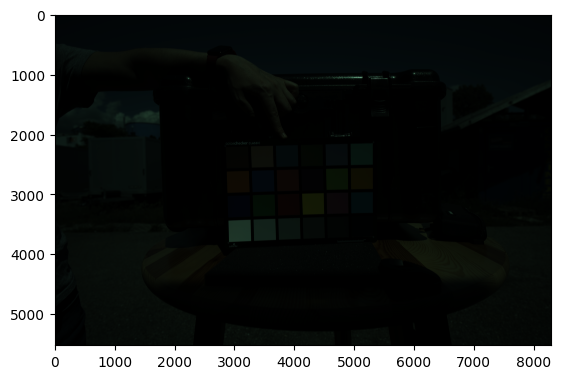

In [157]:
file_raw_0001o = ["data", "NikonZ7ii", "Outdoor", "SPD38", "INDIGO_2022-05-26_Z7ii-A_0001.NEF"]
path_raw_0001o = os.path.join(*file_raw_0001o)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 26], [14, 15, 00]], "ColourChecker": "CCC", "Illuminant": SPD38, "Observer":2}
image_0001o = RawImage(path_raw_0001o, metadata, method="postprocess")

image_0001o.show(method="matplotlib")

RAW RGB data extraction

In [158]:
has_colourchecker, corners, size_rect = image_0001o.automatic_colourchecker_extraction(checker_name="CCC", opencv_descriptor="SIFT")

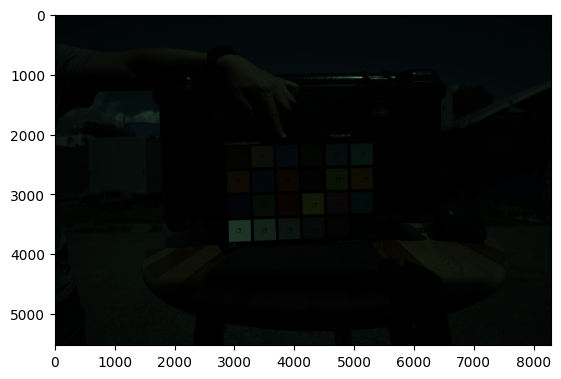

In [159]:
image_0001o.show_colourchecker(checker_name="CCC", show_image=True, method="matplotlib")

In [160]:
CCC_RGB_SPD38 = image_0001o.get_ColourCheckerRGB("CCC").as_pandas_dataframe()

In [161]:
data_ccc_spd38 = pd.merge(CCC_XYZ_SPD38, CCC_RGB_SPD38, on="patch_id")
data_ccc_spd38.insert(0, "ColourChecker", "CCC")
data_ccc_spd38

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD38.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD38.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD38.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD38.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD38.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD38.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD38.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD38.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD38.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD38.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD38.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD38.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD38.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD38.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD38.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD38.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD38.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD38.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD38.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD38.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD38.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD38.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD38.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD38.   

            X          Y          Z  \
0   12.369534  11.020969   6.523938   
1   39.333099  35.619342  22.849698   
2   18.254646  19.353197  31.651975   
3   11.508979  14.068016   6.585266   
4   26.003395  24.310787  40.753356   
5   32.225671  43.617186  41.545436   
6   40.977732  32.096532   6.122255   
7   13.600697  12.006271  36.093387   
8   30.263797  20.064841  12.397939   
9    9.154945   6.766146  13.402739   
10  35.707385  45.820724  10.722548   
11  48.934797  44.447914   7.351591   
12   8.065072   6.408786  25.847637   
13  15.274113  24.078637   9.356271   
14  22.160468  13.463854   5.041435   
15  59.628191  62.000355   8.724007   
16  31.674082  20.743487  28.642231   
17  14.786041  20.137857  36.291046   
18  88.509572  92.133172  86.220458   
19  58.326315  60.888663  58.636759   
20  36.253784  37.870620  36.768782   
21  19.445270  20.226462  19.452563   
22   9.217833   9.622812   9.476507   
23   3.287971   3.412858   3.356818   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD38.   255.555671   283.819719   
1   MeasuredIlluminant object: Illuminant SPD38.   790.490895   898.521332   
2   MeasuredIlluminant object: Illuminant SPD38.   247.310614   619.150884   
3   MeasuredIlluminant object: Illuminant SPD38.   194.685744   405.877211   
4   MeasuredIlluminant object: Illuminant SPD38.   392.877471   709.478668   
5   MeasuredIlluminant object: Illuminant SPD38.   404.945890  1240.536941   
6   MeasuredIlluminant object: Illuminant SPD38.   964.498439   684.155047   
7   MeasuredIlluminant object: Illuminant SPD38.   177.736212   489.084027   
8   MeasuredIlluminant object: Illuminant SPD38.   721.575963   408.909469   
9   MeasuredIlluminant object: Illuminant SPD38.   140.513528   162.284079   
10  MeasuredIlluminant object: Illuminant SPD38.   565.558793  1163.500520   
11  MeasuredIlluminant object: Illuminant SPD38.   892.184964   850.413892   
12  MeasuredIlluminant object: Illuminant SPD38.    76.316597   242.383455   
13  MeasuredIlluminant object: Illuminant SPD38.   244.7791

In [162]:
data_spd38.append(data_ccc_spd38)

### WPP

White - D1

In [163]:
patch_max = find_patch_max_value(data_ccc_spd38)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [164]:
data_ccc_spd38 = apply_wpp(data_ccc_spd38, "D1")
data_ccc_spd38

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD38.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD38.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD38.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD38.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD38.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD38.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD38.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD38.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD38.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD38.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD38.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD38.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD38.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD38.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD38.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD38.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD38.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD38.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD38.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD38.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD38.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD38.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD38.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD38.   

           X         Y         Z  \
0   0.139754  0.119620  0.075666   
1   0.444394  0.386607  0.265015   
2   0.206245  0.210057  0.367105   
3   0.130031  0.152692  0.076377   
4   0.293792  0.263866  0.472665   
5   0.364092  0.473415  0.481851   
6   0.462975  0.348371  0.071007   
7   0.153664  0.130314  0.418617   
8   0.341927  0.217781  0.143793   
9   0.103435  0.073439  0.155447   
10  0.403430  0.497331  0.124362   
11  0.552876  0.482431  0.085265   
12  0.091121  0.069560  0.299785   
13  0.172570  0.261346  0.108516   
14  0.250374  0.146135  0.058471   
15  0.673692  0.672943  0.101183   
16  0.357861  0.225147  0.332198   
17  0.167056  0.218573  0.420910   
18  1.000000  1.000000  1.000000   
19  0.658983  0.660877  0.680079   
20  0.409603  0.411042  0.426451   
21  0.219697  0.219535  0.225614   
22  0.104145  0.104445  0.109910   
23  0.037148  0.037043  0.038933   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD38.  0.136040  0.085792  0.068282  
1   MeasuredIlluminant object: Illuminant SPD38.  0.420802  0.271601  0.231764  
2   MeasuredIlluminant object: Illuminant SPD38.  0.131651  0.187154  0.275026  
3   MeasuredIlluminant object: Illuminant SPD38.  0.103637  0.122687  0.075153  
4   MeasuredIlluminant object: Illuminant SPD38.  0.209140  0.214458  0.319200  
5   MeasuredIlluminant object: Illuminant SPD38.  0.215565  0.374985  0.362546  
6   MeasuredIlluminant object: Illuminant SPD38.  0.513432  0.206804  0.081304  
7   MeasuredIlluminant object: Illuminant SPD38.  0.094614  0.147838  0.321199  
8   MeasuredIlluminant object: Illuminant SPD38.  0.384117  0.123604  0.121409  
9   MeasuredIlluminant object: Illuminant SPD38.  0.074800  0.049055  0.090351  
10  MeasuredIlluminant object: Illuminant SPD38.  0.301064  0.351698  0.129912  
11  MeasuredIlluminant object: Illuminant SPD38.  0.474937  0.257060  0.073798  
12  MeasuredIlluminant object: Illuminant SPD38.  0.040626  0.073267  0.207851  
13  MeasuredIlluminant object: Illuminant SPD38.  0.130303  0.251596  0.127344  
14  Measure

In [165]:
data_ccc_spd38.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.322453   0.307607   0.272468   0.287486   0.248119   0.232998
std     0.229086   0.231937   0.233124   0.236909   0.217486   0.218655
min     0.037148   0.037043   0.038933   0.033266   0.031452   0.031015
25%     0.150186   0.142180   0.097203   0.101381   0.113463   0.081842
50%     0.272083   0.222341   0.190531   0.212353   0.198160   0.166404
75%     0.418301   0.426635   0.419191   0.393288   0.291626   0.319700
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [166]:
data_wpp_spd38.append(data_ccc_spd38)

### CCPPV

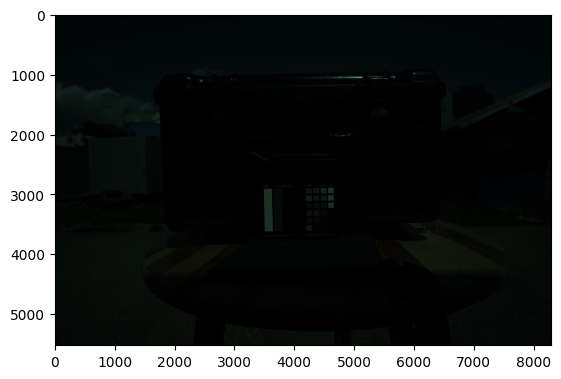

In [167]:
file_raw_0004o = ["data", "NikonZ7ii", "Outdoor", "SPD38", "INDIGO_2022-05-26_Z7ii-A_0004.NEF"]
path_raw_0004o = os.path.join(*file_raw_0004o)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 26], [14, 15, 00]], "ColourChecker": "CCPPV", "Illuminant": SPD38, "Observer":2}
image_0004o = RawImage(path_raw_0004o, metadata, method="postprocess")

image_0004o.show(method="matplotlib")

RAW RGB data extraction

In [171]:
has_colourchecker, corners, size_rect = image_0004o.automatic_colourchecker_extraction(checker_name="CCPPV_24", opencv_descriptor="SIFT") # Fails

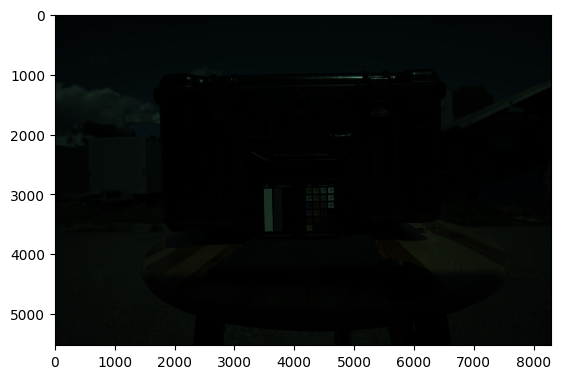

In [173]:
image_0004o.show_colourchecker(checker_name="CCPPV", show_image=True, method="matplotlib")

In [174]:
CCPPV_RGB_SPD38 = image_0004o.get_ColourCheckerRGB("CCPPV").as_pandas_dataframe()

In [175]:
data_ccppv_spd38 = pd.merge(CCPPV_XYZ_SPD38, CCPPV_RGB_SPD38, on="patch_id")
data_ccppv_spd38.insert(0, "ColourChecker", "CCPPV")
data_ccppv_spd38

ColourChecker patch_id                                  illuminant_x  \
0          CCPPV       A1  MeasuredIlluminant object: Illuminant SPD38.   
1          CCPPV       A2  MeasuredIlluminant object: Illuminant SPD38.   
2          CCPPV       A3  MeasuredIlluminant object: Illuminant SPD38.   
3          CCPPV       A4  MeasuredIlluminant object: Illuminant SPD38.   
4          CCPPV       A5  MeasuredIlluminant object: Illuminant SPD38.   
5          CCPPV       A6  MeasuredIlluminant object: Illuminant SPD38.   
6          CCPPV       B1  MeasuredIlluminant object: Illuminant SPD38.   
7          CCPPV       B2  MeasuredIlluminant object: Illuminant SPD38.   
8          CCPPV       B3  MeasuredIlluminant object: Illuminant SPD38.   
9          CCPPV       B4  MeasuredIlluminant object: Illuminant SPD38.   
10         CCPPV       B5  MeasuredIlluminant object: Illuminant SPD38.   
11         CCPPV       B6  MeasuredIlluminant object: Illuminant SPD38.   
12         CCPPV       C1  MeasuredIlluminant object: Illuminant SPD38.   
13         CCPPV       C2  MeasuredIlluminant object: Illuminant SPD38.   
14         CCPPV       C3  MeasuredIlluminant object: Illuminant SPD38.   
15         CCPPV       C4  MeasuredIlluminant object: Illuminant SPD38.   
16         CCPPV       C5  MeasuredIlluminant object: Illuminant SPD38.   
17         CCPPV       C6  MeasuredIlluminant object: Illuminant SPD38.   
18         CCPPV       D1  MeasuredIlluminant object: Illuminant SPD38.   
19         CCPPV       D2  MeasuredIlluminant object: Illuminant SPD38.   
20         CCPPV       D3  MeasuredIlluminant object: Illuminant SPD38.   
21         CCPPV       D4  MeasuredIlluminant object: Illuminant SPD38.   
22         CCPPV       D5  MeasuredIlluminant object: Illuminant SPD38.   
23         CCPPV       D6  MeasuredIlluminant object: Illuminant SPD38.   

            X          Y          Z  \
0   34.028818  38.593487  11.623424   
1   23.667289  16.776966   9.595360   
2   24.968960  17.729251  31.355535   
3   11.819863  10.082147  27.887247   
4   22.735507  29.708904  34.928683   
5   22.182773  33.960038  13.280140   
6    6.093171   5.789229   3.969421   
7   13.035147  11.825968   6.631556   
8   23.599217  22.530102  14.851936   
9   20.530600  19.103096  11.182427   
10  33.347231  32.207182  22.629330   
11  37.765138  36.673224  26.677301   
12   4.255078   4.414356   4.310049   
13   5.956460   6.185707   6.112763   
14  12.360615  12.807302  12.457718   
15  18.899237  19.680432  18.907511   
16  31.209432  32.403110  31.705231   
17  47.711547  49.597875  48.352725   
18   3.296070   3.430223   3.392308   
19   2.871051   2.983702   2.937202   
20   4.460730   4.624042   4.652090   
21  71.596159  74.489619  71.789764   
22  72.939615  76.014380  72.525587   
23  75.117574  78.273421  72.870236   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD38.   961.333333  1601.820988   
1   MeasuredIlluminant object: Illuminant SPD38.   768.228395   439.302469   
2   MeasuredIlluminant object: Illuminant SPD38.   807.135802   778.407407   
3   MeasuredIlluminant object: Illuminant SPD38.   262.925926   583.370370   
4   MeasuredIlluminant object: Illuminant SPD38.   573.592593  1844.765432   
5   MeasuredIlluminant object: Illuminant SPD38.   437.864198  1435.481481   
6   MeasuredIlluminant object: Illuminant SPD38.   142.117284   185.987654   
7   MeasuredIlluminant object: Illuminant SPD38.   359.197531   375.033951   
8   MeasuredIlluminant object: Illuminant SPD38.   757.425926   975.104938   
9   MeasuredIlluminant object: Illuminant SPD38.   615.808642   711.475309   
10  MeasuredIlluminant object: Illuminant SPD38.   928.000000  1266.864198   
11  MeasuredIlluminant object: Illuminant SPD38.  1011.641975  1400.500000   
12  MeasuredIlluminant object: Illuminant SPD38.    79.231481   146.987654   
13  MeasuredIlluminant object: Illuminant SPD38.   100.2685

In [176]:
data_spd38.append(data_ccppv_spd38)

### WPP

White - D6

In [177]:
patch_max = find_patch_max_value(data_ccppv_spd38)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D6', 'D6', 'D6']
['D6', 'D6', 'D6']


In [178]:
data_ccppv_spd38 = apply_wpp(data_ccppv_spd38, "D6")
data_ccppv_spd38

ColourChecker patch_id                                  illuminant_x  \
0          CCPPV       A1  MeasuredIlluminant object: Illuminant SPD38.   
1          CCPPV       A2  MeasuredIlluminant object: Illuminant SPD38.   
2          CCPPV       A3  MeasuredIlluminant object: Illuminant SPD38.   
3          CCPPV       A4  MeasuredIlluminant object: Illuminant SPD38.   
4          CCPPV       A5  MeasuredIlluminant object: Illuminant SPD38.   
5          CCPPV       A6  MeasuredIlluminant object: Illuminant SPD38.   
6          CCPPV       B1  MeasuredIlluminant object: Illuminant SPD38.   
7          CCPPV       B2  MeasuredIlluminant object: Illuminant SPD38.   
8          CCPPV       B3  MeasuredIlluminant object: Illuminant SPD38.   
9          CCPPV       B4  MeasuredIlluminant object: Illuminant SPD38.   
10         CCPPV       B5  MeasuredIlluminant object: Illuminant SPD38.   
11         CCPPV       B6  MeasuredIlluminant object: Illuminant SPD38.   
12         CCPPV       C1  MeasuredIlluminant object: Illuminant SPD38.   
13         CCPPV       C2  MeasuredIlluminant object: Illuminant SPD38.   
14         CCPPV       C3  MeasuredIlluminant object: Illuminant SPD38.   
15         CCPPV       C4  MeasuredIlluminant object: Illuminant SPD38.   
16         CCPPV       C5  MeasuredIlluminant object: Illuminant SPD38.   
17         CCPPV       C6  MeasuredIlluminant object: Illuminant SPD38.   
18         CCPPV       D1  MeasuredIlluminant object: Illuminant SPD38.   
19         CCPPV       D2  MeasuredIlluminant object: Illuminant SPD38.   
20         CCPPV       D3  MeasuredIlluminant object: Illuminant SPD38.   
21         CCPPV       D4  MeasuredIlluminant object: Illuminant SPD38.   
22         CCPPV       D5  MeasuredIlluminant object: Illuminant SPD38.   
23         CCPPV       D6  MeasuredIlluminant object: Illuminant SPD38.   

           X         Y         Z  \
0   0.453007  0.493060  0.159509   
1   0.315070  0.214338  0.131677   
2   0.332398  0.226504  0.430293   
3   0.157351  0.128807  0.382697   
4   0.302666  0.379553  0.479327   
5   0.295307  0.433864  0.182244   
6   0.081115  0.073962  0.054472   
7   0.173530  0.151085  0.091005   
8   0.314164  0.287838  0.203813   
9   0.273313  0.244056  0.153457   
10  0.443934  0.411470  0.310543   
11  0.502747  0.468527  0.366093   
12  0.056646  0.056397  0.059147   
13  0.079295  0.079027  0.083886   
14  0.164550  0.163623  0.170958   
15  0.251595  0.251432  0.259468   
16  0.415474  0.413973  0.435092   
17  0.635158  0.633649  0.663546   
18  0.043879  0.043824  0.046553   
19  0.038221  0.038119  0.040307   
20  0.059383  0.059076  0.063841   
21  0.953121  0.951659  0.985173   
22  0.971006  0.971139  0.995270   
23  1.000000  1.000000  1.000000   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD38.  0.535442  0.506717  0.217024  
1   MeasuredIlluminant object: Illuminant SPD38.  0.427887  0.138968  0.118758  
2   MeasuredIlluminant object: Illuminant SPD38.  0.449557  0.246240  0.449529  
3   MeasuredIlluminant object: Illuminant SPD38.  0.146444  0.184542  0.407419  
4   MeasuredIlluminant object: Illuminant SPD38.  0.319479  0.583570  0.656489  
5   MeasuredIlluminant object: Illuminant SPD38.  0.243881  0.454098  0.236527  
6   MeasuredIlluminant object: Illuminant SPD38.  0.079156  0.058835  0.049480  
7   MeasuredIlluminant object: Illuminant SPD38.  0.200065  0.118638  0.081186  
8   MeasuredIlluminant object: Illuminant SPD38.  0.421870  0.308463  0.245806  
9   MeasuredIlluminant object: Illuminant SPD38.  0.342992  0.225067  0.160691  
10  MeasuredIlluminant object: Illuminant SPD38.  0.516876  0.400758  0.343381  
11  MeasuredIlluminant object: Illuminant SPD38.  0.563463  0.443032  0.377274  
12  MeasuredIlluminant object: Illuminant SPD38.  0.044130  0.046498  0.048428  
13  MeasuredIlluminant object: Illuminant SPD38.  0.055847  0.056835  0.059265  
14  Measure

In [179]:
data_ccppv_spd38.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.346372   0.340624   0.322849   0.366009   0.345134   0.334276
std     0.289919   0.294302   0.305620   0.290490   0.298964   0.305754
min     0.038221   0.038119   0.040307   0.009708   0.009965   0.010715
25%     0.138292   0.116362   0.089225   0.129622   0.103687   0.075705
50%     0.298986   0.247744   0.193029   0.331235   0.259757   0.241167
75%     0.446202   0.442530   0.431492   0.521518   0.467253   0.452836
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [180]:
data_wpp_spd38.append(data_ccppv_spd38)

### XRCCPP

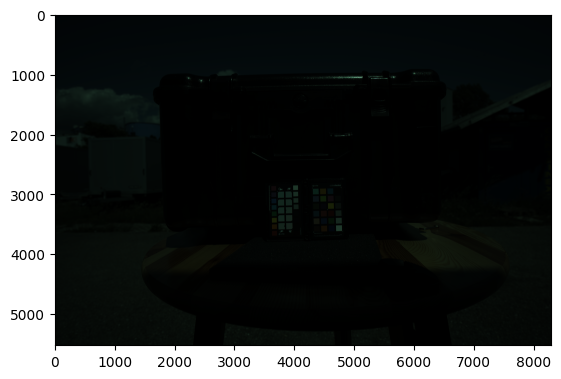

In [181]:
file_raw_0005o = ["data", "NikonZ7ii", "Outdoor", "SPD38", "INDIGO_2022-05-26_Z7ii-A_0005.NEF"]
path_raw_0005o = os.path.join(*file_raw_0005o)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 26], [14, 15, 00]], "ColourChecker": "XRCCPP", "Illuminant": SPD38, "Observer":2}
image_0005o = RawImage(path_raw_0005o, metadata, method="postprocess")

image_0005o.show(method="matplotlib")

RAW RGB data extraction

In [182]:
has_colourchecker, corners, size_rect = image_0005o.automatic_colourchecker_extraction(checker_name="XRCCPP_24", opencv_descriptor="SIFT")

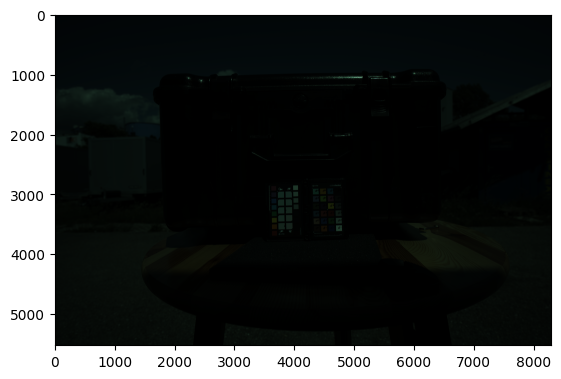

In [183]:
image_0005o.show_colourchecker(checker_name="XRCCPP", show_image=True, method="matplotlib")

In [184]:
XRCCPP_RGB_SPD38 = image_0005o.get_ColourCheckerRGB("XRCCPP").as_pandas_dataframe()

In [185]:
data_xrccpp_spd38 = pd.merge(XRCCPP_XYZ_SPD38, XRCCPP_RGB_SPD38, on="patch_id")
data_xrccpp_spd38.insert(0, "ColourChecker", "XRCCPP")
data_xrccpp_spd38

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD38.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD38.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD38.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD38.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD38.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD38.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD38.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD38.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD38.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD38.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD38.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD38.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD38.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD38.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD38.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD38.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD38.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD38.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD38.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD38.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD38.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD38.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD38.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD38.   

            X          Y          Z  \
0   11.891077  10.661176   6.390290   
1   37.583495  33.737426  21.502524   
2   16.155317  17.097936  27.811143   
3   10.556210  12.861564   6.283393   
4   22.403080  21.154695  34.993859   
5   30.284882  41.298538  39.811491   
6   38.245198  30.128705   5.931726   
7   13.271713  11.802434  34.482086   
8   28.873330  19.122059  11.921118   
9    8.760790   6.556860  12.706182   
10  31.992774  40.904679   9.715278   
11  43.869404  40.125239   6.954858   
12   6.853890   5.728579  19.767842   
13  14.180485  22.181393   8.849408   
14  20.502351  12.376642   4.619937   
15  51.785047  54.126718   7.806769   
16  28.520333  18.758940  25.703252   
17  13.758465  18.657238  33.629416   
18  77.217580  80.514480  74.109832   
19  53.617095  55.921508  53.742197   
20  32.557891  34.000261  32.893509   
21  18.125667  18.889850  18.146416   
22   7.781224   8.141743   8.126925   
23   3.215941   3.346556   3.375571   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD38.   333.320988   381.716049   
1   MeasuredIlluminant object: Illuminant SPD38.  1087.425926  1239.820988   
2   MeasuredIlluminant object: Illuminant SPD38.   378.037037   905.765432   
3   MeasuredIlluminant object: Illuminant SPD38.   271.580247   566.567901   
4   MeasuredIlluminant object: Illuminant SPD38.   585.888889  1085.712963   
5   MeasuredIlluminant object: Illuminant SPD38.   635.104938  1972.598765   
6   MeasuredIlluminant object: Illuminant SPD38.  1185.024691   857.438272   
7   MeasuredIlluminant object: Illuminant SPD38.   249.654321   664.654321   
8   MeasuredIlluminant object: Illuminant SPD38.   927.907407   520.712963   
9   MeasuredIlluminant object: Illuminant SPD38.   240.212963   292.129630   
10  MeasuredIlluminant object: Illuminant SPD38.   880.654321  1810.098765   
11  MeasuredIlluminant object: Illuminant SPD38.  1348.802469  1368.506173   
12  MeasuredIlluminant object: Illuminant SPD38.   123.679012   381.265432   
13  MeasuredIlluminant object: Illuminant SPD38.   320.9506

In [186]:
data_spd38.append(data_xrccpp_spd38)

### WPP

White - D1

In [187]:
patch_max = find_patch_max_value(data_xrccpp_spd38)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [188]:
data_xrccpp_spd38 = apply_wpp(data_xrccpp_spd38, "D1")
data_xrccpp_spd38

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD38.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD38.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD38.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD38.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD38.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD38.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD38.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD38.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD38.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD38.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD38.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD38.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD38.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD38.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD38.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD38.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD38.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD38.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD38.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD38.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD38.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD38.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD38.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD38.   

           X         Y         Z  \
0   0.153994  0.132413  0.086227   
1   0.486722  0.419023  0.290144   
2   0.209218  0.212359  0.375269   
3   0.136707  0.159742  0.084785   
4   0.290129  0.262744  0.472189   
5   0.392202  0.512933  0.537196   
6   0.495291  0.374202  0.080040   
7   0.171874  0.146588  0.465284   
8   0.373922  0.237498  0.160857   
9   0.113456  0.081437  0.171451   
10  0.414320  0.508041  0.131093   
11  0.568127  0.498361  0.093845   
12  0.088761  0.071150  0.266737   
13  0.183643  0.275496  0.119409   
14  0.265514  0.153719  0.062339   
15  0.670638  0.672261  0.105341   
16  0.369350  0.232988  0.346826   
17  0.178178  0.231725  0.453778   
18  1.000000  1.000000  1.000000   
19  0.694364  0.694552  0.725170   
20  0.421638  0.422288  0.443848   
21  0.234735  0.234614  0.244858   
22  0.100770  0.101121  0.109661   
23  0.041648  0.041565  0.045548   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD38.  0.164600  0.104824  0.083194  
1   MeasuredIlluminant object: Illuminant SPD38.  0.536990  0.340469  0.297839  
2   MeasuredIlluminant object: Illuminant SPD38.  0.186681  0.248734  0.353356  
3   MeasuredIlluminant object: Illuminant SPD38.  0.134111  0.155586  0.096478  
4   MeasuredIlluminant object: Illuminant SPD38.  0.289322  0.298149  0.438243  
5   MeasuredIlluminant object: Illuminant SPD38.  0.313626  0.541699  0.528173  
6   MeasuredIlluminant object: Illuminant SPD38.  0.585186  0.235463  0.094044  
7   MeasuredIlluminant object: Illuminant SPD38.  0.123284  0.182522  0.379043  
8   MeasuredIlluminant object: Illuminant SPD38.  0.458217  0.142994  0.141836  
9   MeasuredIlluminant object: Illuminant SPD38.  0.118621  0.080222  0.138700  
10  MeasuredIlluminant object: Illuminant SPD38.  0.434882  0.497074  0.197544  
11  MeasuredIlluminant object: Illuminant SPD38.  0.666062  0.375808  0.126714  
12  MeasuredIlluminant object: Illuminant SPD38.  0.061075  0.104700  0.271414  
13  MeasuredIlluminant object: Illuminant SPD38.  0.158491  0.285084  0.155789  
14  Measure

In [189]:
data_xrccpp_spd38.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.335633   0.319868   0.286329   0.350131   0.300104   0.281618
std     0.231853   0.234386   0.238768   0.254235   0.226896   0.225583
min     0.041648   0.041565   0.045548   0.042151   0.043128   0.044799
25%     0.167404   0.151937   0.102467   0.131607   0.134006   0.122726
50%     0.277822   0.236056   0.208155   0.301474   0.242098   0.212542
75%     0.437909   0.441306   0.446331   0.477910   0.388341   0.392093
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [190]:
data_wpp_spd38.append(data_xrccpp_spd38)

### SCK100

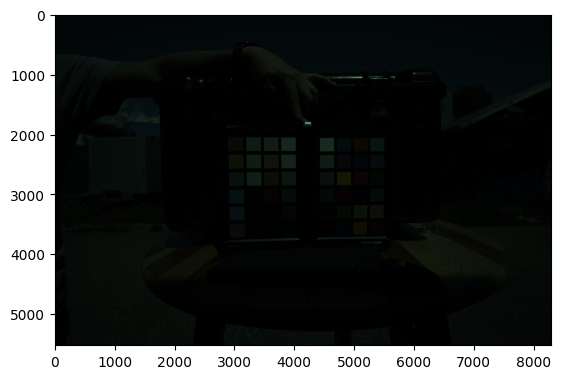

In [191]:
file_raw_0003o =  ["data", "NikonZ7ii", "Outdoor", "SPD38", "INDIGO_2022-05-26_Z7ii-A_0003.NEF"]
path_raw_0003o = os.path.join(*file_raw_0003o)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 26], [14, 15, 00]], "ColourChecker": "SCK100", "Illuminant": SPD38, "Observer":2}
image_0003o = RawImage(path_raw_0003o, metadata, method="postprocess")

image_0003o.show(method="matplotlib")

RAW RGB data extraction

In [192]:
has_colourchecker, corners, size_rect = image_0003o.automatic_colourchecker_extraction(checker_name="SCK100_48", opencv_descriptor="SIFT")

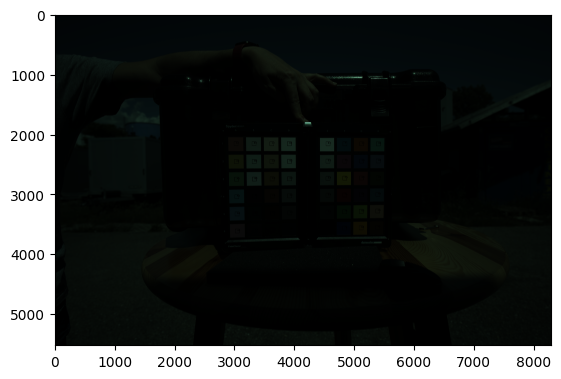

In [193]:
image_0003o.show_colourchecker(checker_name="SCK100", show_image=True, method="matplotlib")

In [194]:
SCK100_RGB_SPD38 = image_0003o.get_ColourCheckerRGB("SCK100").as_pandas_dataframe()

In [195]:
data_sck100_spd38 = pd.merge(SCK100_XYZ_SPD38, SCK100_RGB_SPD38, on="patch_id")
data_sck100_spd38.insert(0, "ColourChecker", "SCK100")
data_sck100_spd38

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD38.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD38.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD38.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD38.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD38.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD38.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD38.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD38.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD38.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD38.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD38.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD38.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD38.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD38.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD38.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD38.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD38.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD38.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD38.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD38.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD38.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD38.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD38.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD38.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD38.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD38.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD38.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD38.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD38.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD38.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD38.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD38.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD38.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD38.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD38.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD38.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD38.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD38.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD38.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD38.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD38.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD38.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD38.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD38.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD38.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD38.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD38.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD38.   

            X          Y          Z  \
0   36.589483  29.002199  18.884403   
1   47.100036  48.091830  15.446829   
2   27.222282  35.837295  20.504365   
3   24.772245  30.764313  44.381060   
4   26.699007  28.003448  48.533309   
5   34.604982  27.362907  30.370301   
6   59.245651  60.108604  55.791131   
7   56.271981  

In [196]:
data_spd38.append(data_sck100_spd38)

### WPP

White - E1

In [197]:
patch_max = find_patch_max_value(data_sck100_spd38)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E1', 'E1', 'E1']
['E1', 'E1', 'E1']


In [198]:
data_sck100_spd38 = apply_wpp(data_sck100_spd38, "E1")
data_sck100_spd38

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD38.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD38.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD38.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD38.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD38.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD38.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD38.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD38.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD38.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD38.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD38.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD38.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD38.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD38.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD38.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD38.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD38.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD38.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD38.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD38.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD38.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD38.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD38.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD38.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD38.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD38.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD38.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD38.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD38.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD38.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD38.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD38.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD38.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD38.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD38.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD38.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD38.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD38.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD38.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD38.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD38.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD38.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD38.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD38.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD38.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD38.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD38.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD38.   

           X         Y         Z  \
0   0.423715  0.323524  0.224013   
1   0.545430  0.536472  0.183235   
2   0.315241  0.399771  0.243230   
3   0.286869  0.343181  0.526463   
4   0.309181  0.312383  0.575718   
5   0.400734  0.305237  0.360263   
6   0.686079  0.670521  0.661813   
7   0.651643  0.669271  0.649288   
8  

In [199]:
data_sck100_spd38.describe()

X          Y          Z          R          G          B
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000
mean    0.352295   0.340599   0.304916   0.362381   0.318867   0.297858
std     0.248913   0.248738   0.250364   0.274052   0.254121   0.256365
min     0.047090   0.047131   0.048739   0.014525   0.015146   0.015941
25%     0.142515   0.137983   0.083301   0.114554   0.103189   0.074516
50%     0.312211   0.295110   0.233621   0.300192   0.270520   0.215055
75%     0.515768   0.490815   0.459350   0.579439   0.462780   0.437893
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [200]:
data_wpp_spd38.append(data_sck100_spd38)

## Merge data

In [201]:
data_pd_spd38 = pd.concat(data_spd38, ignore_index=True)

data_pd_spd38 = data_pd_spd38.drop(columns="illuminant_y")
data_pd_spd38 = data_pd_spd38.rename(columns={"illuminant_x":"illuminant"})
data_pd_spd38["illuminant"] = "SPD38" # as str to avoid error
data_pd_spd38

ColourChecker patch_id illuminant          X          Y          Z  \
0           CCDSG       B2      SPD38  17.019386  10.871192  14.000805   
1           CCDSG       B3      SPD38  39.099460  32.775758  44.825191   
2           CCDSG       B4      SPD38  15.293600   9.750916  24.760794   
3           CCDSG       B5      SPD38  18.983367  21.458387  53.076720   
4           CCDSG       B6      SPD38  24.444401  31.933887  50.187256   
..            ...      ...        ...        ...        ...        ...   
211        SCK100       H2      SPD38  25.121599  23.837313  39.637589   
212        SCK100       H3      SPD38  10.529568  13.067079   6.374851   
213        SCK100       H4      SPD38  17.586503  18.875761  30.838330   
214        SCK100       H5      SPD38  38.344772  34.811550  22.347540   
215        SCK100       H6      SPD38  11.239707   9.899898   5.966087   

              R            G            B  
0    307.319616   142.462277   209.135802  
1    685.875857   853.616941   934.073045  
2    213.211934   169.615226   390.382716  
3    188.825103   823.554870  1190.126200  
4    304.474623  1182.124143  1231.043210  
..          ...          ...          ...  
211  409.758434   767.117215   882.391436  
212  164.416739   358.621756   143.660035  
213  252.686851   643.076990   690.790225  
214  876.229671   957.936851   594.035467  
215  242.404844   214.080882   106.615484  

[216 rows x 9 columns]

In [202]:
data_pd_wpp_spd38 = pd.concat(data_wpp_spd38, ignore_index=True)

data_pd_wpp_spd38 = data_pd_wpp_spd38.drop(columns="illuminant_y")
data_pd_wpp_spd38 = data_pd_wpp_spd38.rename(columns={"illuminant_x":"illuminant"})
data_pd_wpp_spd38["illuminant"] = "SPD38" # as str to avoid error
data_pd_wpp_spd38

ColourChecker patch_id illuminant         X         Y         Z         R  \
0           CCDSG       B2      SPD38  0.194845  0.119592  0.164366  0.199224   
1           CCDSG       B3      SPD38  0.447627  0.360561  0.526236  0.444627   
2           CCDSG       B4      SPD38  0.175087  0.107268  0.290685  0.138217   
3           CCDSG       B5      SPD38  0.217329  0.236061  0.623106  0.122408   
4           CCDSG       B6      SPD38  0.279850  0.351300  0.589185  0.197379   
..            ...      ...        ...       ...       ...       ...       ...   
211        SCK100       H2      SPD38  0.290914  0.265909  0.470194  0.270774   
212        SCK100       H3      SPD38  0.121935  0.145765  0.075621  0.108649   
213        SCK100       H4      SPD38  0.203656  0.210562  0.365814  0.166979   
214        SCK100       H5      SPD38  0.444042  0.388328  0.265094  0.579025   
215        SCK100       H6      SPD38  0.130159  0.110435  0.070772  0.160185   

            G         B  
0    0.051682  0.098347  
1    0.309675  0.439250  
2    0.061533  0.183578  
3    0.298769  0.559660  
4    0.428850  0.578901  
..        ...       ...  
211  0.283907  0.422429  
212  0.132725  0.068775  
213  0.238001  0.330704  
214  0.354529  0.284384  
215  0.079231  0.051040  

[216 rows x 9 columns]

## Export data as CSV

Merge all data

In [203]:
data_LR = pd.concat([data_pd_spd32, data_pd_spd33, data_pd_spd38], ignore_index=True)

In [204]:
data_LR["X"] = data_LR["X"]/100
data_LR["Y"] = data_LR["Y"]/100
data_LR["Z"] = data_LR["Z"]/100

In [205]:
data_LR

ColourChecker patch_id illuminant         X         Y         Z  \
0           CCDSG       B2      SPD32  0.162688  0.107404  0.109655   
1           CCDSG       B3      SPD32  0.373855  0.325257  0.357534   
2           CCDSG       B4      SPD32  0.141648  0.095605  0.193802   
3           CCDSG       B5      SPD32  0.172358  0.210064  0.428721   
4           CCDSG       B6      SPD32  0.229014  0.315951  0.406238   
..            ...      ...        ...       ...       ...       ...   
643        SCK100       H2      SPD38  0.251216  0.238373  0.396376   
644        SCK100       H3      SPD38  0.105296  0.130671  0.063749   
645        SCK100       H4      SPD38  0.175865  0.188758  0.308383   
646        SCK100       H5      SPD38  0.383448  0.348116  0.223475   
647        SCK100       H6      SPD38  0.112397  0.098999  0.059661   

               R            G            B  
0     949.927734   387.938477   270.404297  
1    2042.370605  1675.081055  1041.405762  
2     686.565430   394.347168   468.224121  
3     516.881348  1322.264160  1294.863770  
4     844.342773  2028.788574  1357.920410  
..           ...          ...          ...  
643   409.758434   767.117215   882.391436  
644   164.416739   358.621756   143.660035  
645   252.686851   643.076990   690.790225  
646   876.229671   957.936851   594.035467  
647   242.404844   214.080882   106.615484  

[648 rows x 9 columns]

In [206]:
path_csv = os.path.join("res", "csv", "NikonZ7ii_LR_Data.csv")
data_LR.to_csv(path_csv, sep=";")

Merge all data

In [207]:
data_WPP = pd.concat([data_pd_wpp_spd32, data_pd_wpp_spd33, data_pd_wpp_spd38], ignore_index=True)

In [208]:
data_WPP

ColourChecker patch_id illuminant         X         Y         Z         R  \
0           CCDSG       B2      SPD32  0.192085  0.118150  0.159627  0.201206   
1           CCDSG       B3      SPD32  0.441410  0.357800  0.520467  0.432597   
2           CCDSG       B4      SPD32  0.167244  0.105171  0.282120  0.145422   
3           CCDSG       B5      SPD32  0.203503  0.231081  0.624095  0.109481   
4           CCDSG       B6      SPD32  0.270396  0.347562  0.591367  0.178841   
..            ...      ...        ...       ...       ...       ...       ...   
643        SCK100       H2      SPD38  0.290914  0.265909  0.470194  0.270774   
644        SCK100       H3      SPD38  0.121935  0.145765  0.075621  0.108649   
645        SCK100       H4      SPD38  0.203656  0.210562  0.365814  0.166979   
646        SCK100       H5      SPD38  0.444042  0.388328  0.265094  0.579025   
647        SCK100       H6      SPD38  0.130159  0.110435  0.070772  0.160185   

            G         B  
0    0.069046  0.109121  
1    0.298136  0.420256  
2    0.070187  0.188950  
3    0.235341  0.522538  
4    0.361090  0.547985  
..        ...       ...  
643  0.283907  0.422429  
644  0.132725  0.068775  
645  0.238001  0.330704  
646  0.354529  0.284384  
647  0.079231  0.051040  

[648 rows x 9 columns]

In [ ]:
path_csv = os.path.join("res", "csv", "NikonZ7ii_WPP_Data.csv")
data_WPP.to_csv(path_csv, sep=";")